## Data Exploration and Analysis

In [ ]:
# Importing some important libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import joblib
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
df = pd.read_csv(r'C:\Users\Sunjeevi\PycharmProjects\NewBankingFraudTransaction\.venv\UNewBankingFraud\Dataset\Train.csv')
pd.set_option('display.max.columns', None)
df.head()

,Transaction ID,Customer ID,Transaction Amount,Transaction Date,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,IP Address,Shipping Address,Billing Address,Is Fraudulent,Account Age Days,Transaction Hour
0,15d2e414-8735-46fc-9e02-80b472b2580f,d1b87f62-51b2-493b-ad6a-77e0fe13e785,58.09,2024-02-20 05:58:41,bank transfer,electronics,1,17,Amandaborough,tablet,212.195.49.198,Unit 8934 Box 0058\r\nDPO AA 05437,Unit 8934 Box 0058\r\nDPO AA 05437,0,30,5
1,0bfee1a0-6d5e-40da-a446-d04e73b1b177,37de64d5-e901-4a56-9ea0-af0c24c069cf,389.96,2024-02-25 08:09:45,debit card,electronics,2,40,East Timothy,desktop,208.106.249.121,"634 May Keys\r\nPort Cherylview, NV 75063","634 May Keys\r\nPort Cherylview, NV 75063",0,72,8
2,e588eef4-b754-468e-9d90-d0e0abfc1af0,1bac88d6-4b22-409a-a06b-425119c57225,134.19,2024-03-18 03:42:55,PayPal,home & garden,2,22,Davismouth,tablet,76.63.88.212,"16282 Dana Falls Suite 790\r\nRothhaven, IL 15564","16282 Dana Falls Suite 790\r\nRothhaven, IL 15564",0,63,3
3,4de46e52-60c3-49d9-be39-636681009789,2357c76e-9253-4ceb-b44e-ef4b71cb7d4d,226.17,2024-03-16 20:41:31,bank transfer,clothing,5,31,Lynnberg,desktop,207.208.171.73,"828 Strong Loaf Apt. 646\r\nNew Joshua, UT 84798","828 Strong Loaf Apt. 646\r\nNew Joshua, UT 84798",0,124,20
4,074a76de-fe2d-443e-a00c-f044cdb68e21,45071bc5-9588-43ea-8093-023caec8ea1c,121.53,2024-01-15 05:08:17,bank transfer,clothing,2,51,South Nicole,tablet,190.172.14.169,29799 Jason Hills Apt. 439\r\nWest Richardtown...,29799 Jason Hills Apt. 439\r\nWest Richardtown...,0,158,5


In [ ]:
df.columns

Index(['Transaction ID', 'Customer ID', 'Transaction Amount',
       'Transaction Date', 'Payment Method', 'Product Category', 'Quantity',
       'Customer Age', 'Customer Location', 'Device Used', 'IP Address',
       'Shipping Address', 'Billing Address', 'Is Fraudulent',
       'Account Age Days', 'Transaction Hour'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472952 entries, 0 to 1472951
Data columns (total 16 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   Transaction ID      1472952 non-null  object 
 1   Customer ID         1472952 non-null  object 
 2   Transaction Amount  1472952 non-null  float64
 3   Transaction Date    1472952 non-null  object 
 4   Payment Method      1472952 non-null  object 
 5   Product Category    1472952 non-null  object 
 6   Quantity            1472952 non-null  int64  
 7   Customer Age        1472952 non-null  int64  
 8   Customer Location   1472952 non-null  object 
 9   Device Used         1472952 non-null  object 
 10  IP Address          1472952 non-null  object 
 11  Shipping Address    1472952 non-null  object 
 12  Billing Address     1472952 non-null  object 
 13  Is Fraudulent       1472952 non-null  int64  
 14  Account Age Days    1472952 non-null  int64  
 15  Transaction Hou

In [ ]:
df.shape

(1472952, 16)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Transaction Amount,1472952.0,226.768309,270.395099,10.0,68.61,151.76,296.05,12701.75
Quantity,1472952.0,3.000230,1.414736,1.0,2.00,3.00,4.00,5.00
Customer Age,1472952.0,34.512081,10.003134,-16.0,28.00,35.00,41.00,86.00
Is Fraudulent,1472952.0,0.050129,0.218212,0.0,0.00,0.00,0.00,1.00
Account Age Days,1472952.0,179.646398,106.864223,1.0,86.00,179.00,272.00,365.00
Transaction Hour,1472952.0,11.286964,6.975995,0.0,5.00,11.00,17.00,23.00


In [ ]:
df.isnull().sum()

Transaction ID        0
Customer ID           0
Transaction Amount    0
Transaction Date      0
Payment Method        0
Product Category      0
Quantity              0
Customer Age          0
Customer Location     0
Device Used           0
IP Address            0
Shipping Address      0
Billing Address       0
Is Fraudulent         0
Account Age Days      0
Transaction Hour      0
dtype: int64

There are no null values in any of the columns of the dataset.

In [ ]:
len_not_fraud = len(df['Is Fraudulent'][df['Is Fraudulent'] == 0])
len_is_fraud = len(df['Is Fraudulent'][df['Is Fraudulent'] == 1])

arr = np.array([len_not_fraud, len_is_fraud])
labels = ['Not Fraudulent', 'Fraudulent']
print(f"Total No. of Non-Fraudulent Cases: {len_not_fraud}")
print(f"Total No. Fraudulent Cases: {len_is_fraud}")

Total No. of Non-Fraudulent Cases: 1399114
Total No. Fraudulent Cases: 73838


We can see that the number of fraudulent cases in the dataset is really small with only 8213 transactions out of over 6 million transactions is tagged as fraud. Therefore the dataset is highly imbalanced and some workarounds we have to be applied to fix this problem.

In [ ]:
df['Transaction Amount'].describe()

count    1.472952e+06
mean     2.267683e+02
std      2.703951e+02
min      1.000000e+01
25%      6.861000e+01
50%      1.517600e+02
75%      2.960500e+02
max      1.270175e+04
Name: Transaction Amount, dtype: float64

In [ ]:
from collections import Counter

def detect_outliers(df, n, features):
    outlier_indices = []
    for col in features:
        # Calculate quartiles
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        # Interquartile range
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = 1.5 * IQR
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    return multiple_outliers

In [ ]:
# Usage example
Outliers_to_drop = detect_outliers(df, 2, ['Transaction Amount','Quantity','Customer Age','Account Age Days','Transaction Hour'])

In [ ]:
df.loc[Outliers_to_drop]

,Transaction ID,Customer ID,Transaction Amount,Transaction Date,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,IP Address,Shipping Address,Billing Address,Is Fraudulent,Account Age Days,Transaction Hour


In [ ]:
df = df.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)

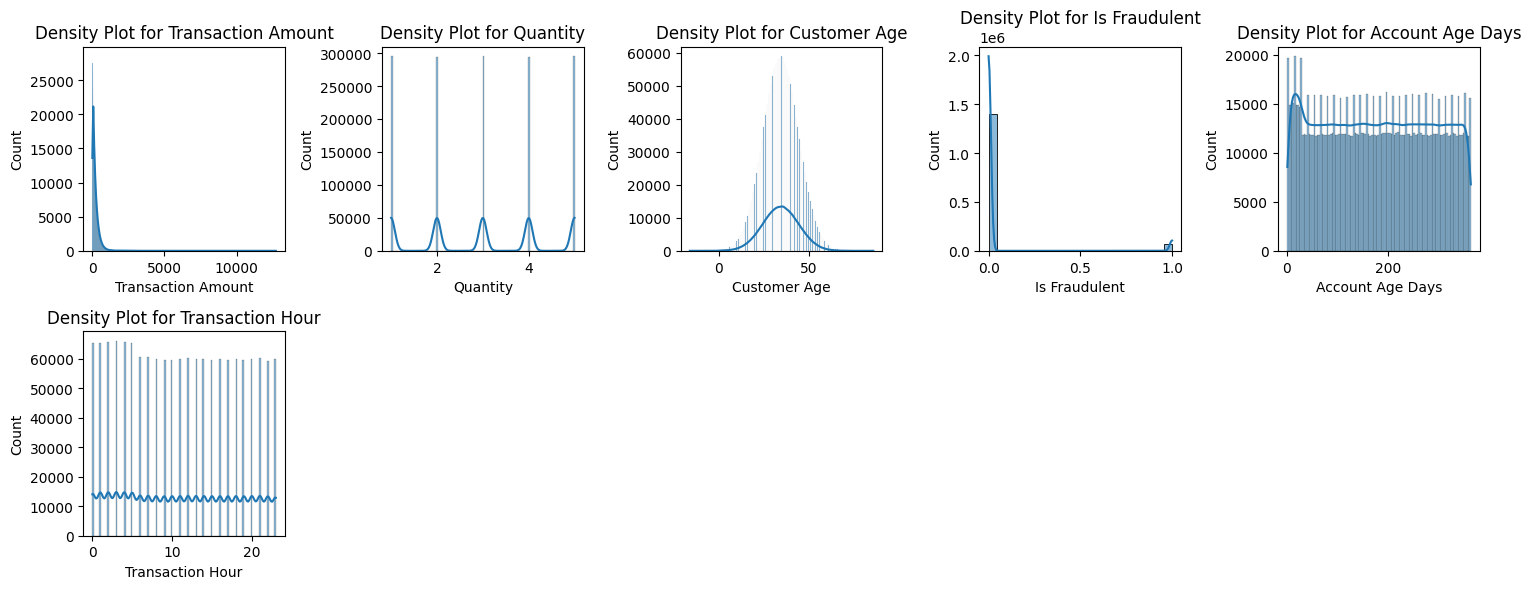

In [ ]:

# Select all numeric columns
numeric_columns = df.select_dtypes(include=['number'])

# Calculate the number of rows and columns needed
num_cols = len(numeric_columns.columns)
num_rows = (num_cols - 1) // 5 + 1
num_cols_adjusted = min(num_cols, 5)

# Set the figure size
plt.figure(figsize=(15, 3 * num_rows))

# Loop through each numeric column
for i, column in enumerate(numeric_columns.columns):
    plt.subplot(num_rows, num_cols_adjusted, i + 1)
    sns.histplot(df[column], kde=True)
    plt.title(f'Density Plot for {column}')
    plt.xlabel(column)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

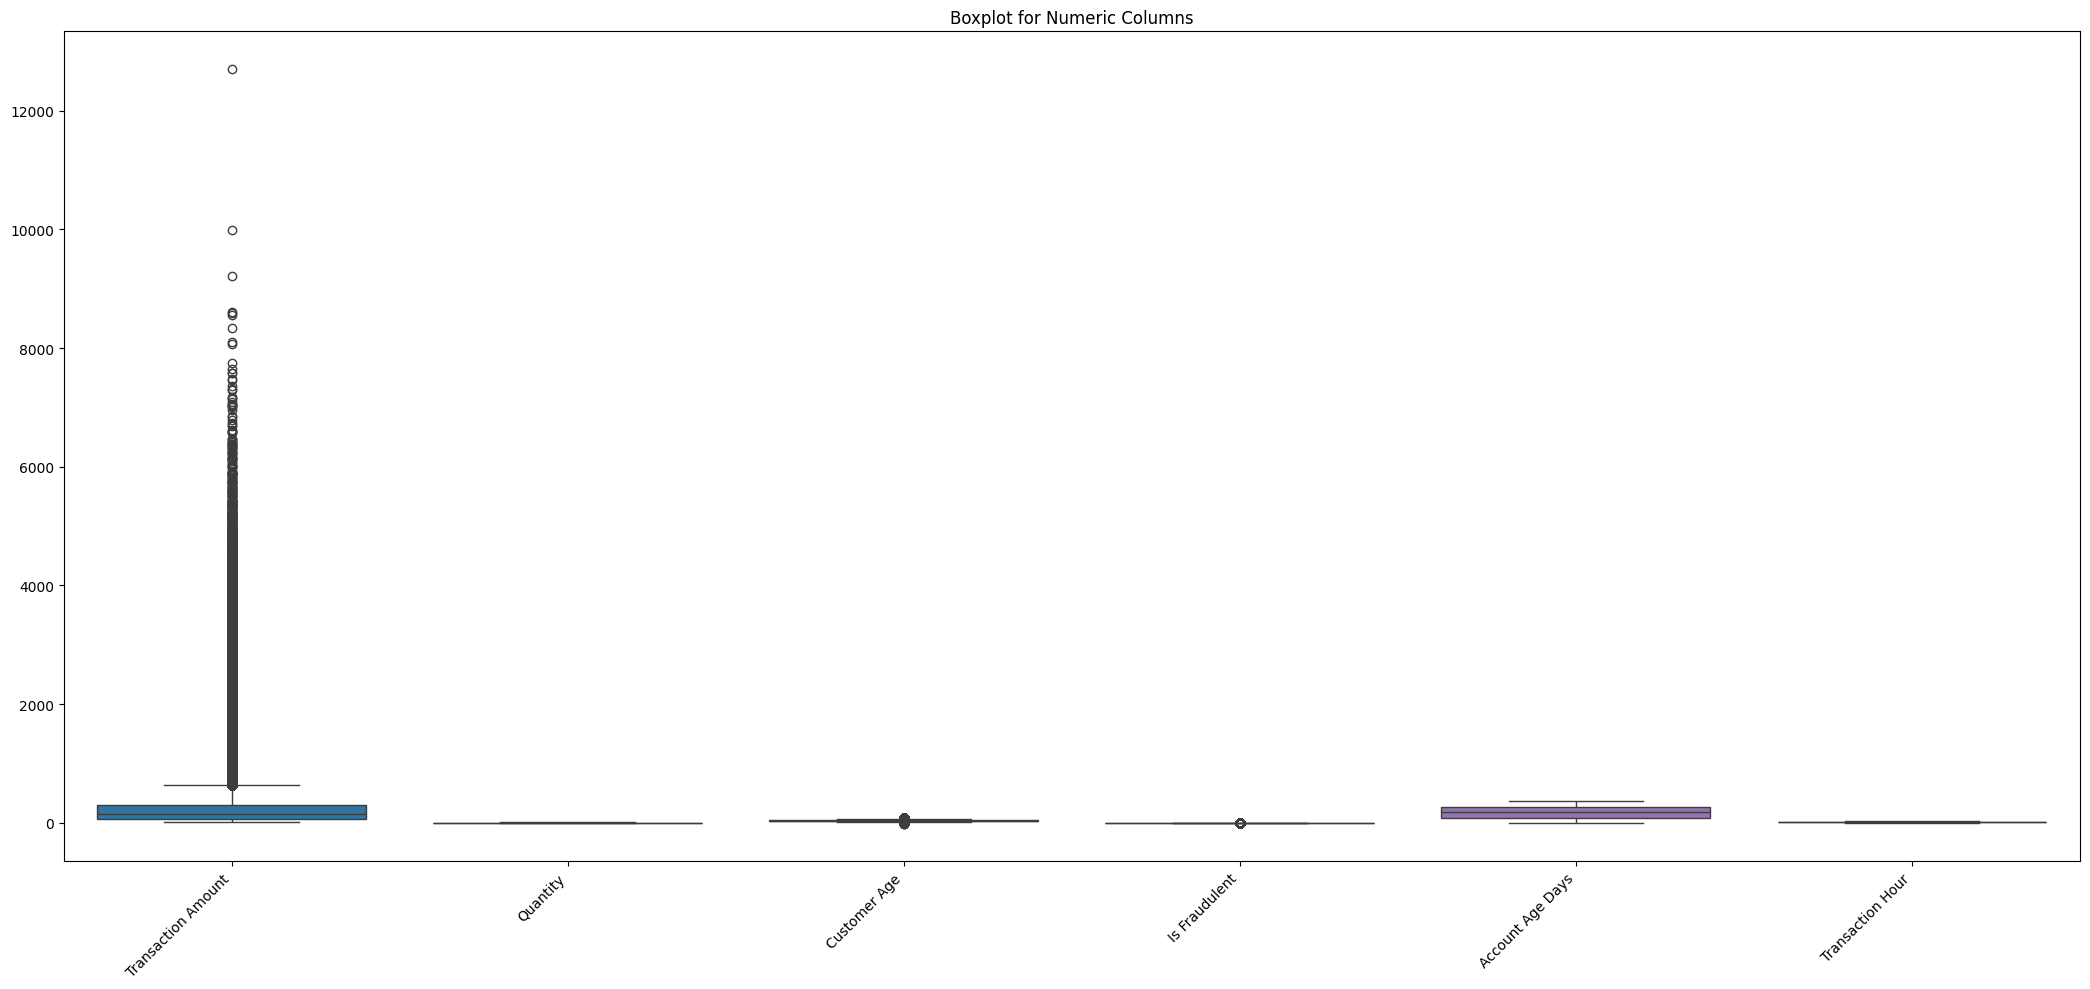

In [ ]:
plt.figure(figsize=(21, 10))
ax = sns.boxplot(data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")  # Memutar dan menata label sumbu x
plt.title("Boxplot for Numeric Columns")
plt.tight_layout()  # Memastikan label terlihat dengan baik
plt.show()

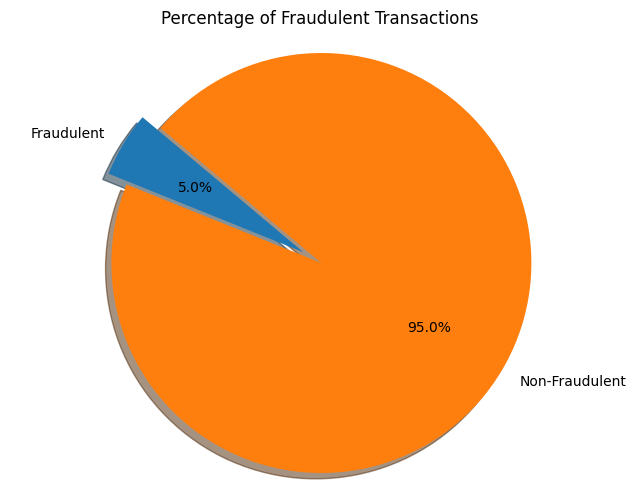

In [ ]:

# Calculate the percentage of fraudulent transactions
percent_fraudulent = (len_is_fraud / (len_is_fraud + len_not_fraud)) * 100

# Calculate the percentage of non-fraudulent transactions
percent_non_fraudulent = 100 - percent_fraudulent

# Pie chart
labels = ['Fraudulent', 'Non-Fraudulent']
sizes = [percent_fraudulent, percent_non_fraudulent]
explode = (0.1, 0)  # explode the fraudulent slice

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Percentage of Fraudulent Transactions')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show plot
plt.show()

## Age

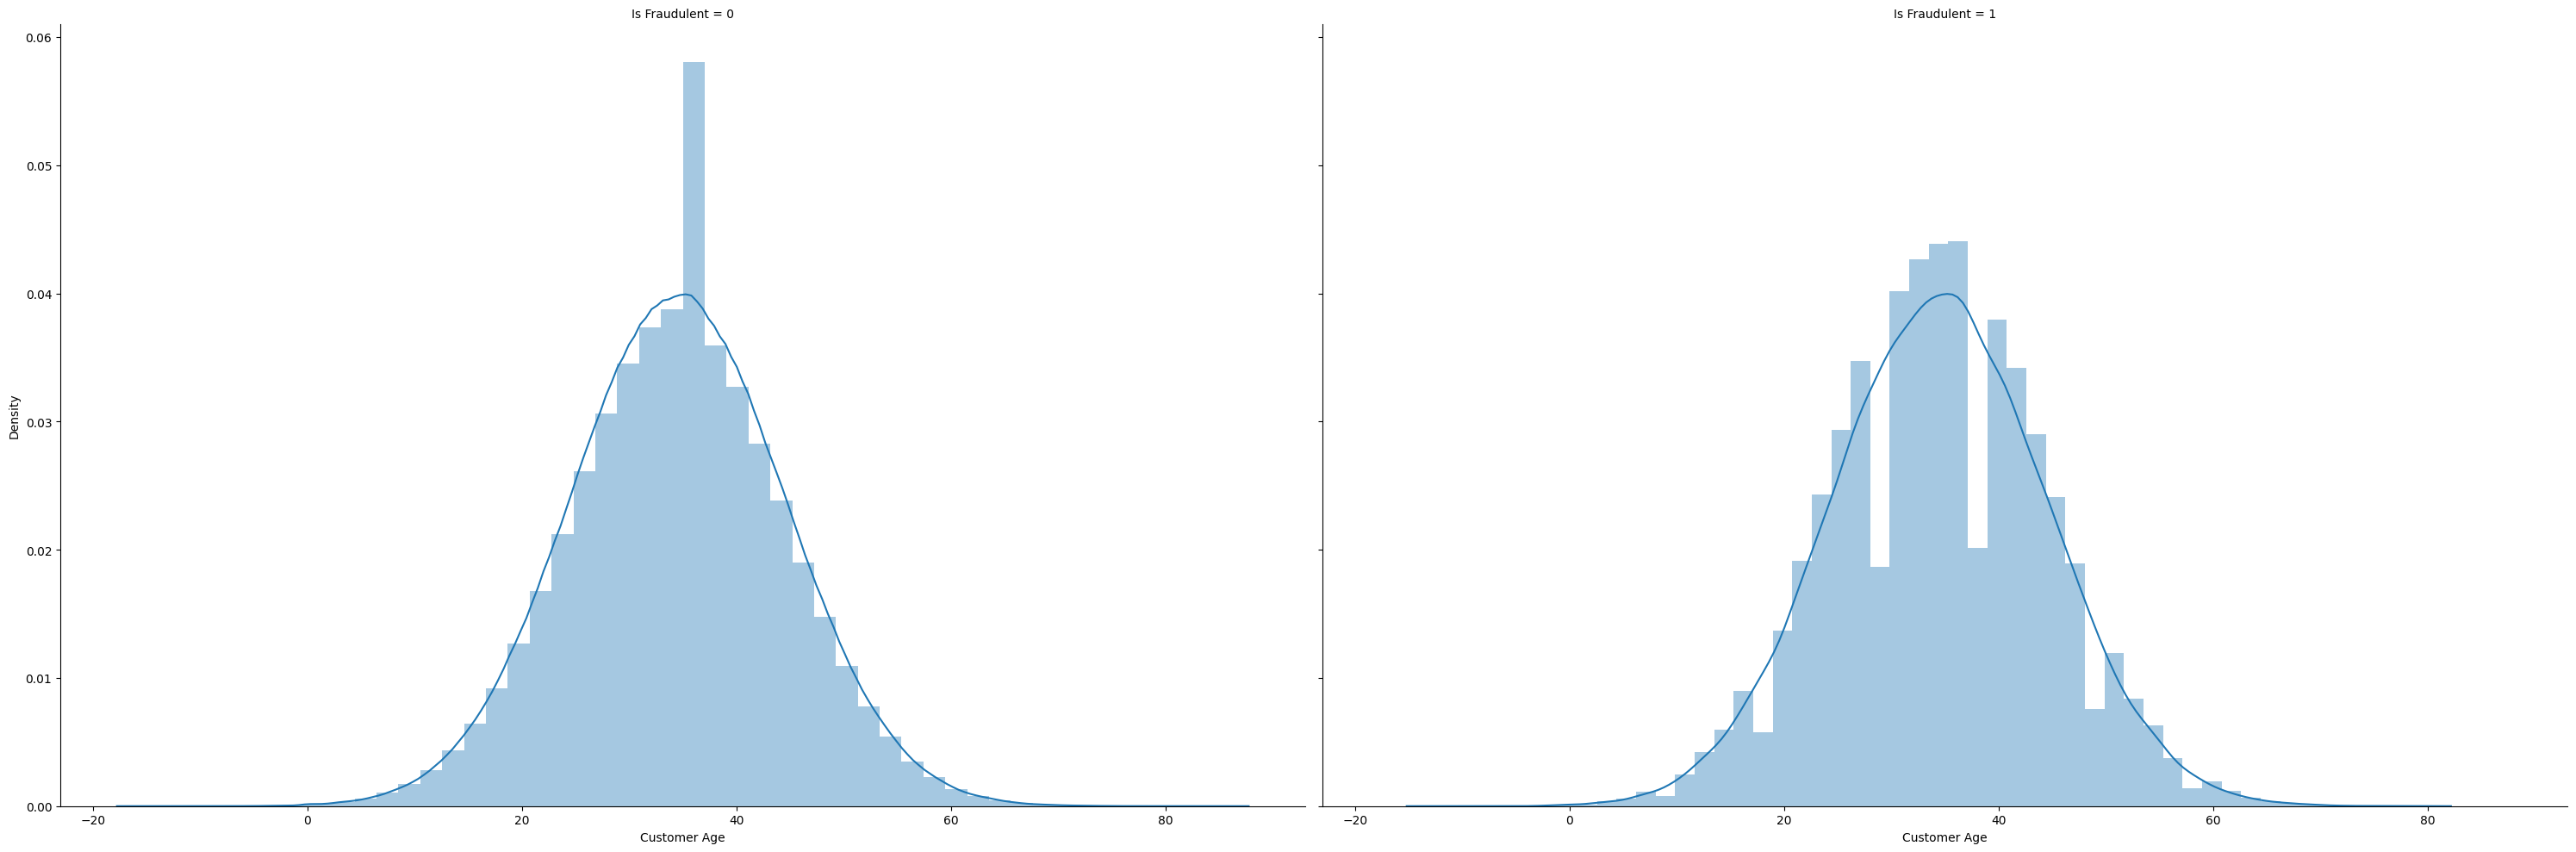

In [ ]:

# Create FacetGrid to explore Age vs Fraudulent
g = sns.FacetGrid(df, col='Is Fraudulent', height=10, aspect=1.5)  # Setting height and aspect
g = g.map(sns.distplot, "Customer Age")

# Show plot
plt.show()

In [ ]:

# Assuming you have a dfFrame called 'df' with columns 'age' and 'subscribed'
# Define the number of bins for age
num_bins = 10

# Create a new column 'age_bins' by binning the ages
df['age_bins'] = pd.qcut(df['Customer Age'], q=num_bins, duplicates='drop')

# Assuming 'df' is your dfFrame and 'age_bins' is a categorical variable
df['age_bins'] = df['age_bins'].cat.reorder_categories(
    df['age_bins'].cat.categories[::-1], ordered=True
)
df = df.sort_values(by='age_bins')

# Calculate the count of each bin for both subscribed and not subscribed groups
age_subscribed = df[df['Is Fraudulent'] == 1].groupby('age_bins').size()
age_subscribed_sorted = age_subscribed.sort_index(ascending=True)
age_not_subscribed = df[df['Is Fraudulent'] == 0].groupby('age_bins').size()

# Calculate the total count of each bin
total_subscribed = age_subscribed.sum()
total_not_subscribed = age_not_subscribed.sum()

# Calculate the proportion of subscribed and not subscribed within each bin
proportion_subscribed = age_subscribed / total_subscribed
proportion_not_subscribed = age_not_subscribed / total_not_subscribed

# Avoid division by zero and replace NaN values with 0
proportion_subscribed = proportion_subscribed.replace({np.nan: 0})
proportion_not_subscribed = proportion_not_subscribed.replace({np.nan: 0})

# Calculate WoE and Information Value (IV)
woe = np.log(proportion_subscribed / proportion_not_subscribed)
iv = (proportion_subscribed - proportion_not_subscribed) * woe

# Create a DataFrame to store the results
age_woe_table = pd.DataFrame({
    'Bin': age_subscribed_sorted.index,
    'WoE': woe,
    'IV': iv
})

# Change the format of age bins
age_woe_table['Bin'] = age_woe_table['Bin'].astype(str).str.replace(r'\((\d+\.\d+), (\d+\.\d+)\]', r'(\1 - \2]', regex=True)

# Sort the table by WoE values
age_woe_table = age_woe_table.sort_values(by='WoE')

In [ ]:
age_woe_table

,Bin,WoE,IV
age_bins,,,
"(37.0, 40.0]",(37.0 - 40.0],-0.017108,3.122708e-05
"(47.0, 86.0]",(47.0 - 86.0],-0.011039,1.178046e-05
"(29.0, 32.0]",(29.0 - 32.0],-0.007270,5.909063e-06
"(40.0, 43.0]",(40.0 - 43.0],-0.005835,3.056263e-06
"(32.0, 35.0]",(32.0 - 35.0],0.000560,3.739559e-08
"(43.0, 47.0]",(43.0 - 47.0],0.001855,3.007412e-07
"(26.0, 29.0]",(26.0 - 29.0],0.002169,4.561428e-07
"(-16.001, 22.0]","(-16.001, 22.0]",0.008622,8.558013e-06
"(22.0, 26.0]",(22.0 - 26.0],0.010740,1.120127e-05


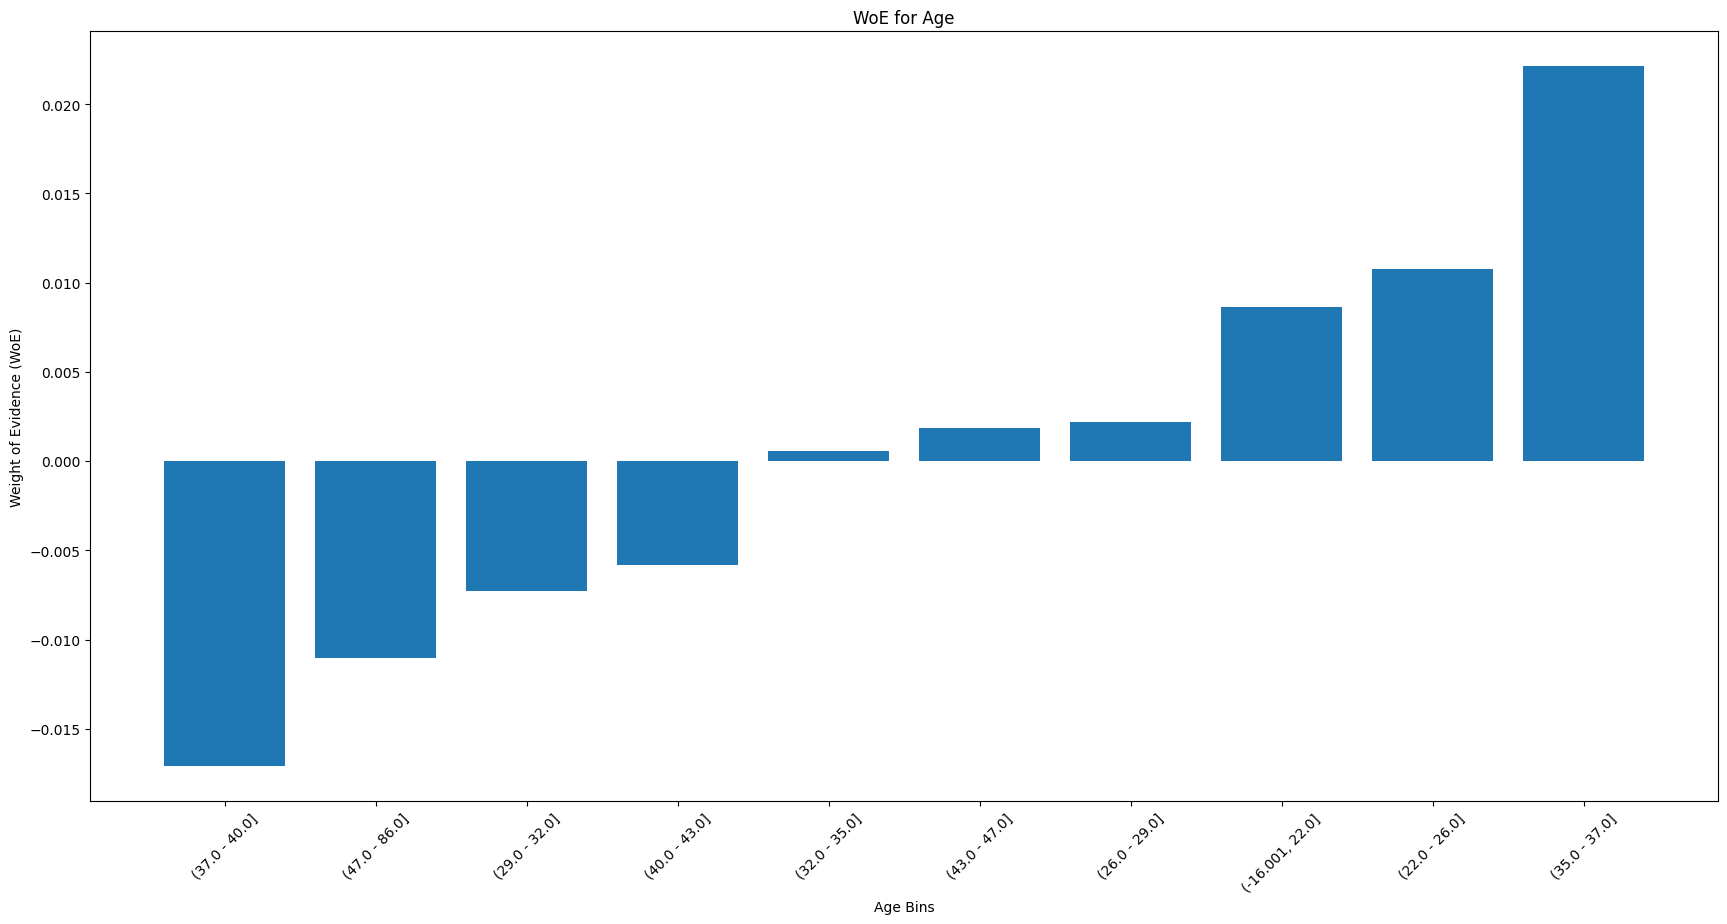

In [ ]:

# Create a bar chart to visualize WoE
plt.figure(figsize=(21,10))
plt.bar(age_woe_table['Bin'].astype(str), age_woe_table['WoE'])
plt.xlabel('Age Bins')
plt.ylabel('Weight of Evidence (WoE)')
plt.title('WoE for Age')
plt.xticks(rotation=45)
plt.show()

## Transaction Amount

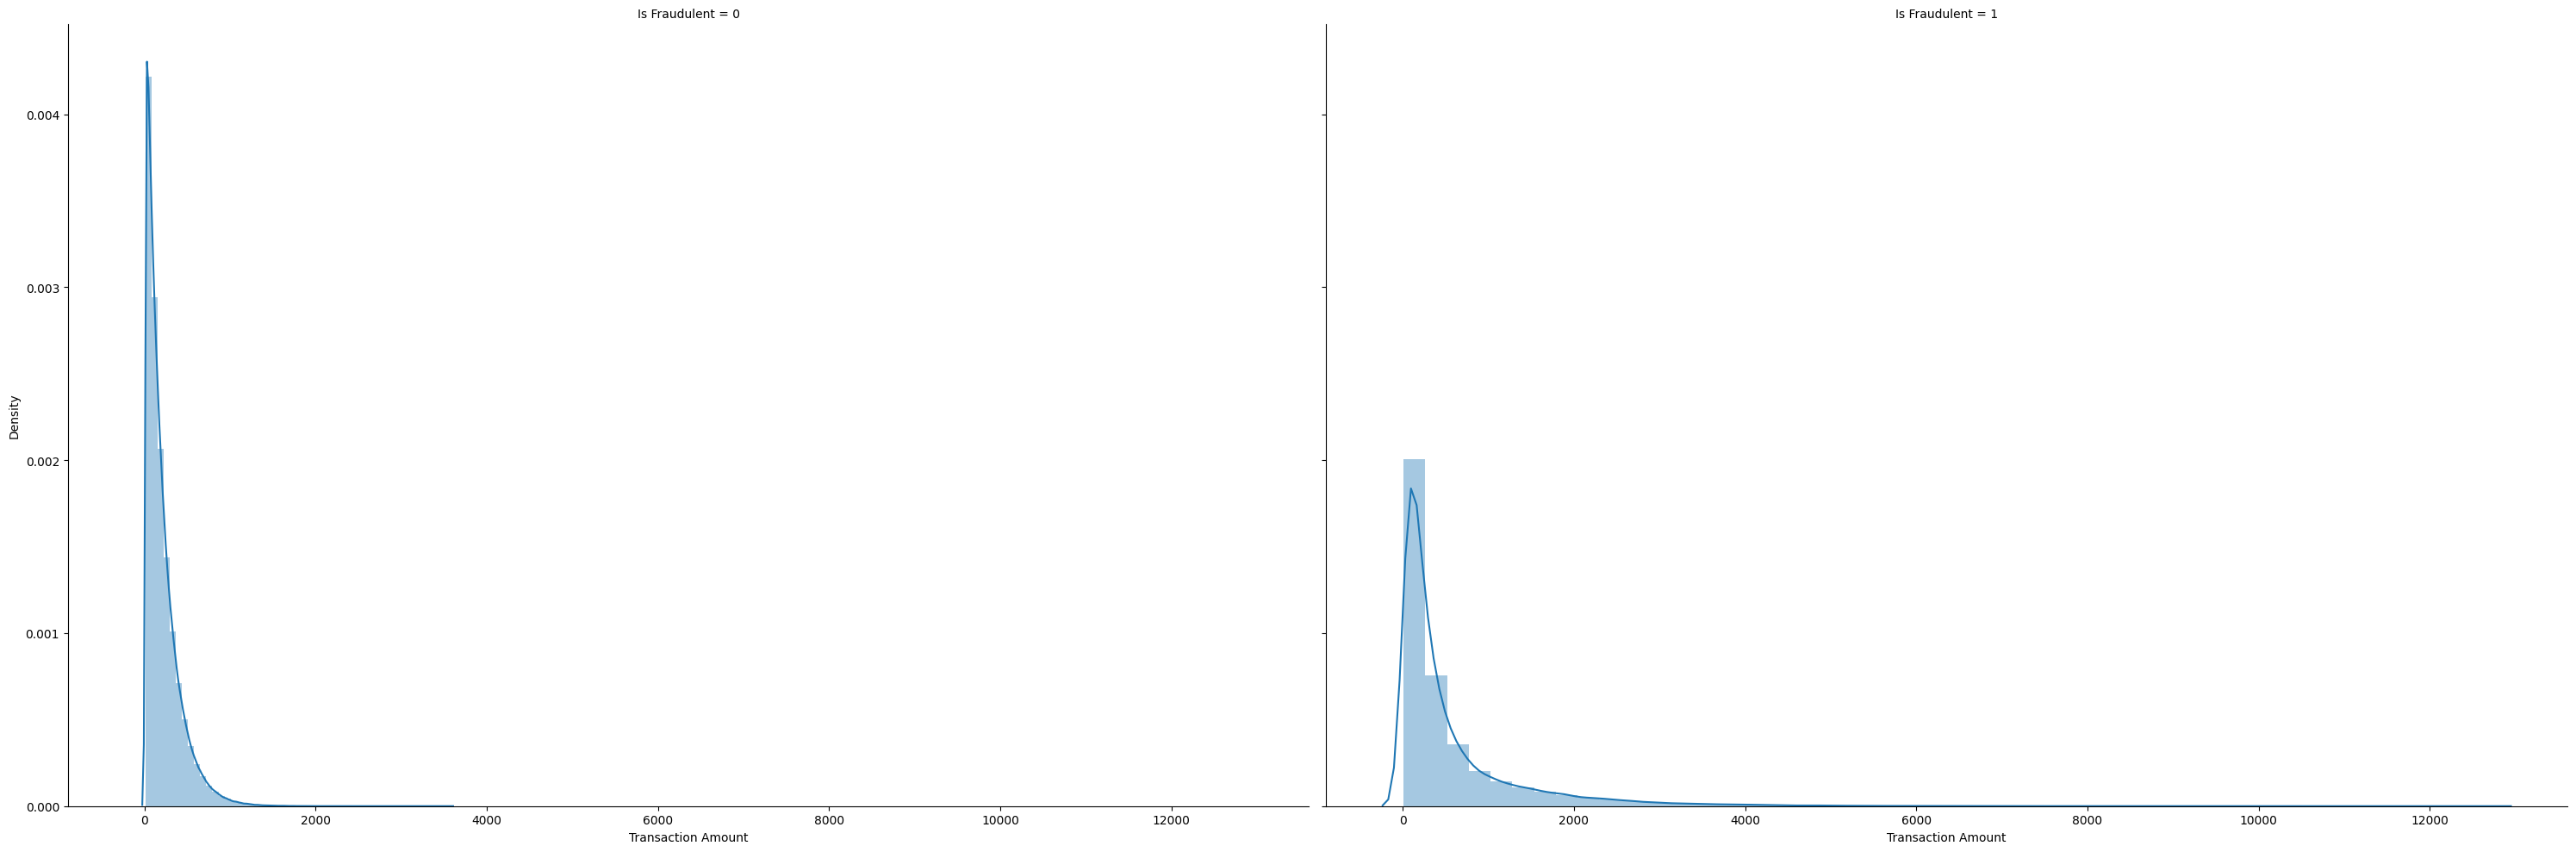

In [ ]:

# Create FacetGrid to explore Age vs Fraudulent
g = sns.FacetGrid(df, col='Is Fraudulent', height=10, aspect=1.5)  # Setting height and aspect
g = g.map(sns.distplot, "Transaction Amount")

# Show plot
plt.show()

In [ ]:

# Assuming you have a dfFrame called 'df' with columns 'Transaction Amount' and 'Is Fraudulent'
# Define the number of bins for Transaction Amount
num_bins = 10

# Create a new column 'Transaction Amount_bins' by binning the Transaction Amounts
df['Transaction Amount_bins'] = pd.qcut(df['Transaction Amount'], q=num_bins, duplicates='drop')

# Assuming 'df' is your dfFrame and 'Transaction Amount_bins' is a categorical variable
df['Transaction Amount_bins'] = df['Transaction Amount_bins'].cat.reorder_categories(
    df['Transaction Amount_bins'].cat.categories[::-1], ordered=True
)
df = df.sort_values(by='Transaction Amount_bins')

# Calculate the count of each bin for both Is Fraudulent and not Is Fraudulent groups
transaction_amount_fraudulent = df[df['Is Fraudulent'] == 1].groupby('Transaction Amount_bins').size()
transaction_amount_fraudulent_sorted = transaction_amount_fraudulent.sort_index(ascending=True)
transaction_amount_not_fraudulent = df[df['Is Fraudulent'] == 0].groupby('Transaction Amount_bins').size()

# Calculate the total count of each bin
total_fraudulent = transaction_amount_fraudulent.sum()
total_not_fraudulent = transaction_amount_not_fraudulent.sum()

# Calculate the proportion of Is Fraudulent and not Is Fraudulent within each bin
proportion_fraudulent = transaction_amount_fraudulent / total_fraudulent
proportion_not_fraudulent = transaction_amount_not_fraudulent / total_not_fraudulent

# Avoid division by zero and replace NaN values with 0
proportion_fraudulent = proportion_fraudulent.replace({np.nan: 0})
proportion_not_fraudulent = proportion_not_fraudulent.replace({np.nan: 0})

# Calculate WoE and Information Value (IV)
woe = np.log(proportion_fraudulent / proportion_not_fraudulent)
iv = (proportion_fraudulent - proportion_not_fraudulent) * woe

# Create a dfFrame to store the results
transaction_amount_woe_table = pd.DataFrame({
    'Bin': transaction_amount_fraudulent_sorted.index,
    'WoE': woe,
    'IV': iv
})

# Change the format of Transaction Amount bins
transaction_amount_woe_table['Bin'] = transaction_amount_woe_table['Bin'].astype(str).str.replace(r'\(([-.\d]+), ([-.\d]+)\]', r'(\1 - \2]', regex=True)

# Sort the table by WoE values
transaction_amount_woe_table = transaction_amount_woe_table.sort_values(by='WoE')

In [ ]:
transaction_amount_woe_table

,Bin,WoE,IV
Transaction Amount_bins,,,
"(9.999, 31.45]",(9.999 - 31.45],-0.511415,0.020902
"(31.45, 55.51]",(31.45 - 55.51],-0.483750,0.018917
"(55.51, 82.72]",(55.51 - 82.72],-0.351366,0.010566
"(82.72, 114.44]",(82.72 - 114.44],-0.333674,0.009603
"(151.76, 197.74]",(151.76 - 197.74],-0.289410,0.007366
"(114.44, 151.76]",(114.44 - 151.76],-0.264064,0.006199
"(197.74, 257.61]",(197.74 - 257.61],-0.231478,0.004833
"(257.61, 343.42]",(257.61 - 343.42],-0.165459,0.002543
"(343.42, 493.77]",(343.42 - 493.77],0.016440,0.000027


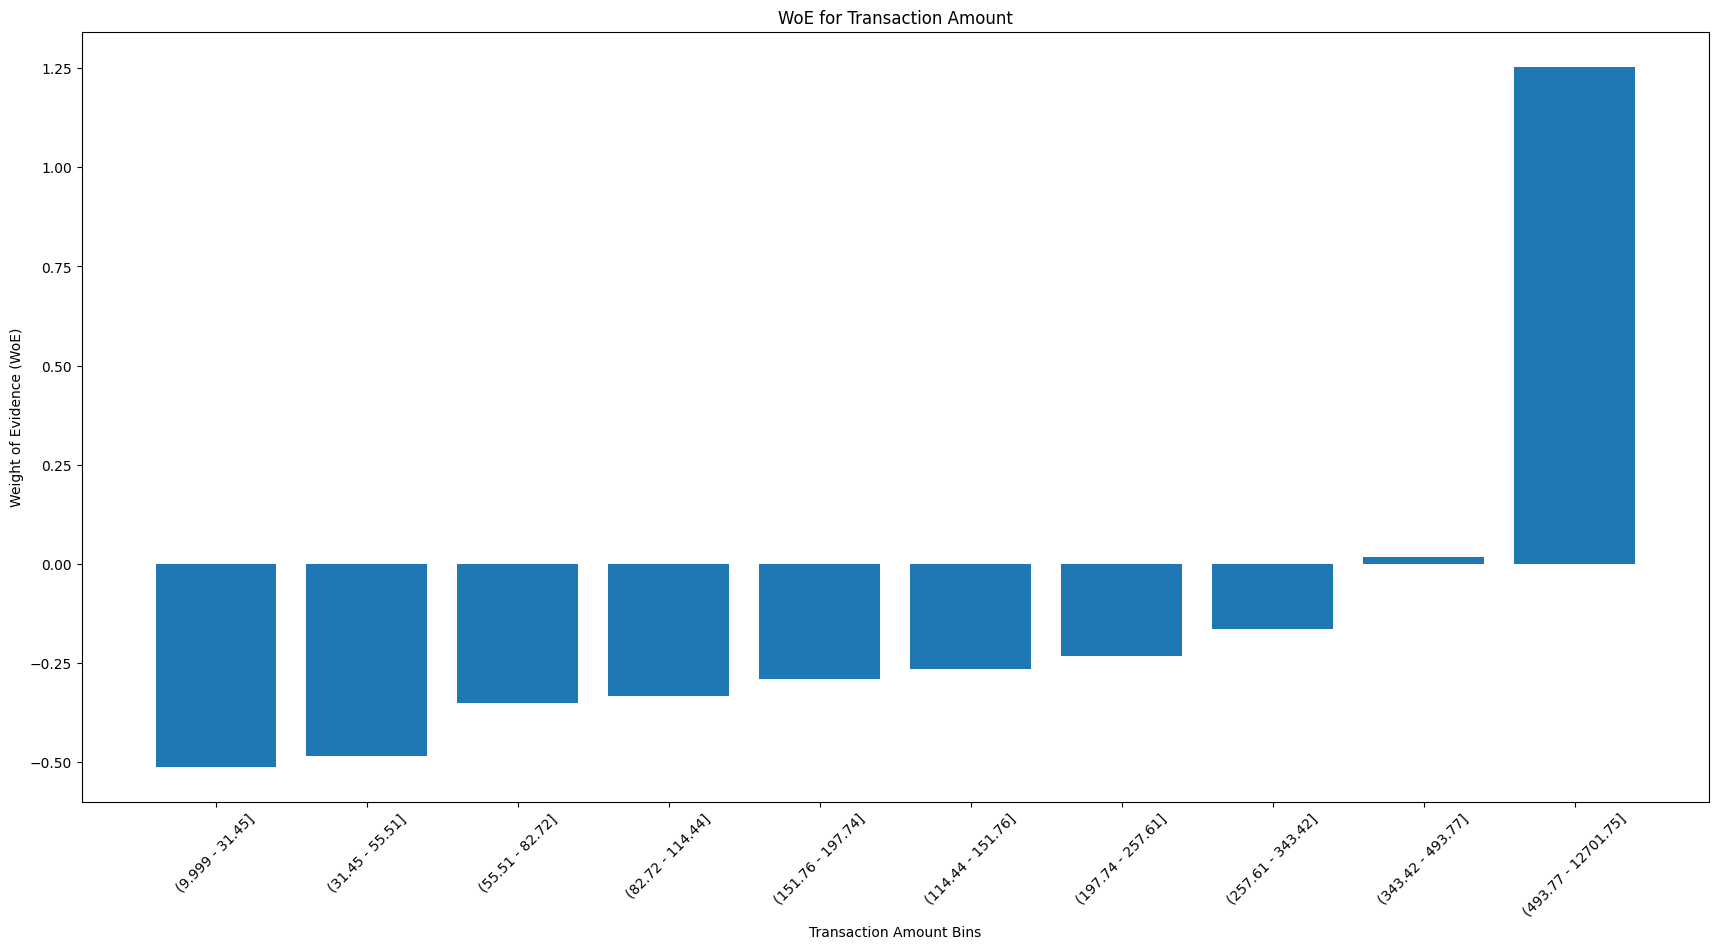

In [ ]:

# Create a bar chart to visualize WoE
plt.figure(figsize=(21, 10))
plt.bar(transaction_amount_woe_table['Bin'].astype(str), transaction_amount_woe_table['WoE'])
plt.xlabel('Transaction Amount Bins')
plt.ylabel('Weight of Evidence (WoE)')
plt.title('WoE for Transaction Amount')
plt.xticks(rotation=45)
plt.show()

## Account Age Days

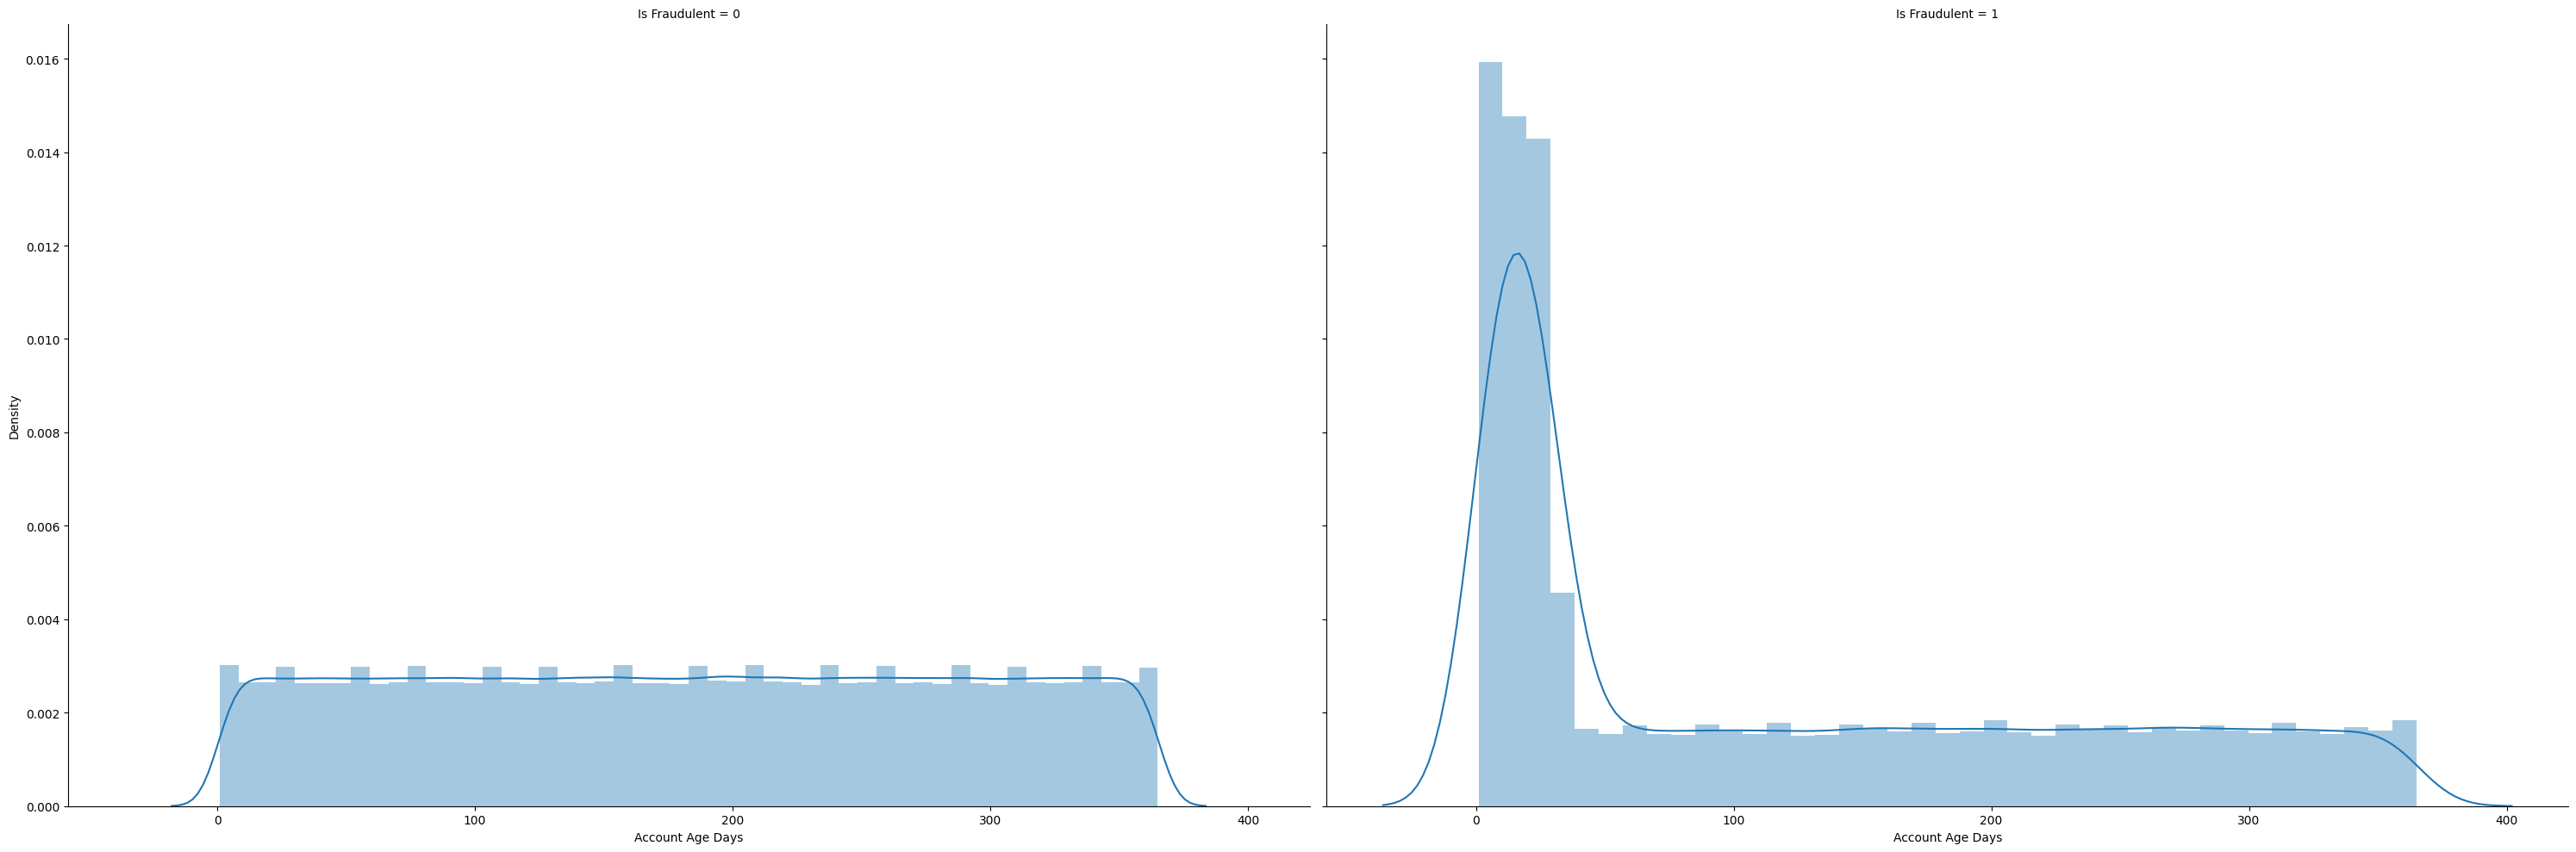

In [ ]:

# Create FacetGrid to explore Age vs Fraudulent
g = sns.FacetGrid(df, col='Is Fraudulent', height=10, aspect=1.5)  # Setting height and aspect
g = g.map(sns.distplot, "Account Age Days")

# Show plot
plt.show()

In [ ]:

# Assuming you have a dfFrame called 'df' with columns 'Account Age Days' and 'Is Fraudulent'
# Define the number of bins for Account Age Days
num_bins = 10

# Create a new column 'Account Age Days_bins' by binning the Account Age Days
df['Account Age Days_bins'] = pd.qcut(df['Account Age Days'], q=num_bins, duplicates='drop')

# Assuming 'df' is your dfFrame and 'Account Age Days_bins' is a categorical variable
df['Account Age Days_bins'] = df['Account Age Days_bins'].cat.reorder_categories(
    df['Account Age Days_bins'].cat.categories[::-1], ordered=True
)
df = df.sort_values(by='Account Age Days_bins')

# Calculate the count of each bin for both Is Fraudulent and not Is Fraudulent groups
account_age_days_fraudulent = df[df['Is Fraudulent'] == 1].groupby('Account Age Days_bins').size()
account_age_days_fraudulent_sorted = account_age_days_fraudulent.sort_index(ascending=True)
account_age_days_not_fraudulent = df[df['Is Fraudulent'] == 0].groupby('Account Age Days_bins').size()

# Calculate the total count of each bin
total_fraudulent = account_age_days_fraudulent.sum()
total_not_fraudulent = account_age_days_not_fraudulent.sum()

# Calculate the proportion of Is Fraudulent and not Is Fraudulent within each bin
proportion_fraudulent = account_age_days_fraudulent / total_fraudulent
proportion_not_fraudulent = account_age_days_not_fraudulent / total_not_fraudulent

# Avoid division by zero and replace NaN values with 0
proportion_fraudulent = proportion_fraudulent.replace({np.nan: 0})
proportion_not_fraudulent = proportion_not_fraudulent.replace({np.nan: 0})

# Calculate WoE and Information Value (IV)
woe = np.log(proportion_fraudulent / proportion_not_fraudulent)
iv = (proportion_fraudulent - proportion_not_fraudulent) * woe

# Create a dfFrame to store the results
account_age_days_woe_table = pd.DataFrame({
    'Bin': account_age_days_fraudulent_sorted.index,
    'WoE': woe,
    'IV': iv
})

# Change the format of Account Age Days bins
account_age_days_woe_table['Bin'] = account_age_days_woe_table['Bin'].astype(str).str.replace(r'\(([-.\d]+), ([-.\d]+)\]', r'(\1 - \2]', regex=True)

# Sort the table by WoE values
account_age_days_woe_table = account_age_days_woe_table.sort_values(by='WoE')


In [ ]:
account_age_days_woe_table

,Bin,WoE,IV
Account Age Days_bins,,,
"(105.0, 142.0]",(105.0 - 142.0],-0.538396,0.022675
"(68.0, 105.0]",(68.0 - 105.0],-0.530426,0.022125
"(216.0, 254.0]",(216.0 - 254.0],-0.521120,0.022068
"(179.0, 216.0]",(179.0 - 216.0],-0.513172,0.021014
"(328.0, 365.0]",(328.0 - 365.0],-0.507981,0.020470
"(291.0, 328.0]",(291.0 - 328.0],-0.505649,0.020275
"(30.0, 68.0]",(30.0 - 68.0],-0.501854,0.020573
"(254.0, 291.0]",(254.0 - 291.0],-0.489068,0.019202
"(142.0, 179.0]",(142.0 - 179.0],-0.489058,0.019185


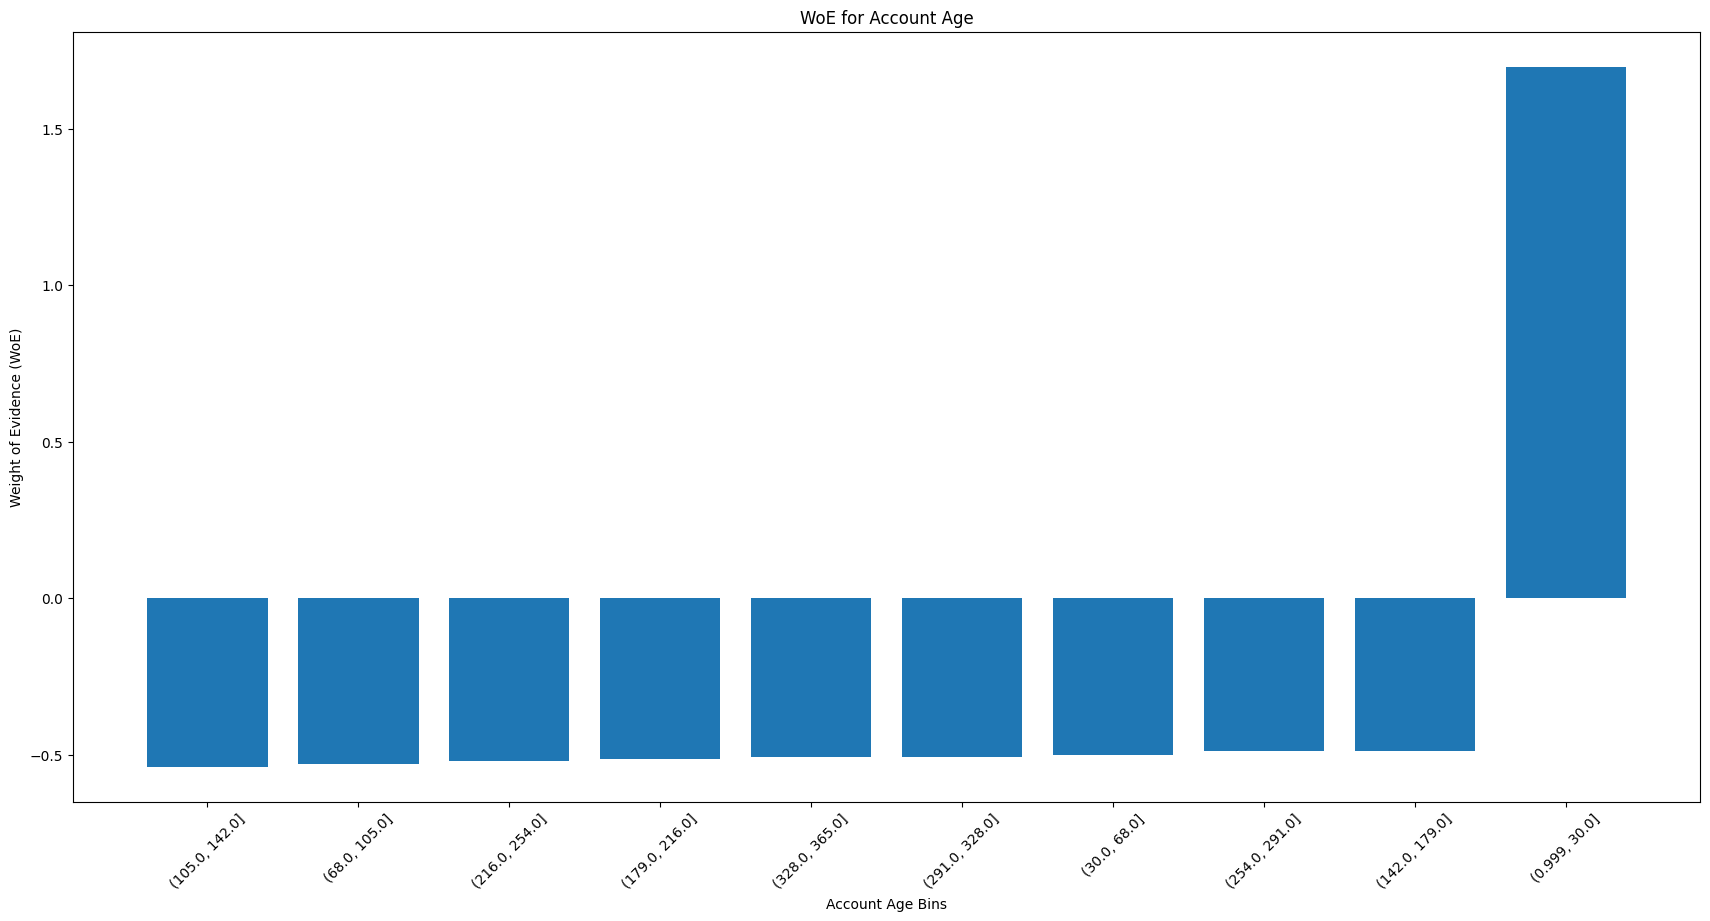

In [ ]:

# Create a bar chart to visualize WoE
plt.figure(figsize=(21, 10))
plt.bar(account_age_days_woe_table.index.astype(str), account_age_days_woe_table['WoE'])  # Using the index (day_bins) as x-axis
plt.xlabel('Account Age Bins')
plt.ylabel('Weight of Evidence (WoE)')
plt.title('WoE for Account Age')
plt.xticks(rotation=45)
plt.show()

## Others Columns

In [ ]:


# Define the number of bins
num_bins = 10

# Define the numerical columns
numerical_columns = ['Quantity','Transaction Hour']

# Create a dfFrame 'woe_iv_results' to store results
woe_iv_results = pd.DataFrame()

for column in numerical_columns:
    # Create bins
    df[column+'_bins'] = pd.qcut(df[column], q=num_bins, duplicates='drop')

    # Calculate WoE and IV
    subscribed = df[df['Is Fraudulent'] == 1].groupby(column+'_bins').size()
    not_subscribed = df[df['Is Fraudulent'] == 0].groupby(column+'_bins').size()

    total_subscribed = subscribed.sum()
    total_not_subscribed = not_subscribed.sum()

    proportion_subscribed = subscribed / total_subscribed
    proportion_not_subscribed = not_subscribed / total_not_subscribed

    woe = np.log(proportion_subscribed / proportion_not_subscribed)
    iv = (proportion_subscribed - proportion_not_subscribed) * woe

    # Create a dfFrame to store the results for this column
    woe_iv_column = pd.DataFrame({
        'Bin': subscribed.index,
        'WoE': woe,
        'IV': iv
    })

    woe_iv_column['Variable'] = column  # Add the variable name

    # Append the results to the main dfFrame
    woe_iv_results = pd.concat([woe_iv_results, woe_iv_column], ignore_index=True)

# Change the format of bins
woe_iv_results['Bin'] = woe_iv_results['Bin'].astype(str).str.replace(r'\(([-.\d]+), ([-.\d]+)\]', r'(\1 - \2]', regex=True)

# Sort the table by WoE values
woe_iv_results = woe_iv_results.sort_values(by='WoE')

In [ ]:
woe_iv_results

,Bin,WoE,IV,Variable
12,(19.0 - 21.0],-0.531949,0.018299,Transaction Hour
10,(14.0 - 16.0],-0.524170,0.017732,Transaction Hour
8,(9.0 - 11.0],-0.513420,0.017114,Transaction Hour
11,(16.0 - 19.0],-0.511271,0.025431,Transaction Hour
13,(21.0 - 23.0],-0.510130,0.016860,Transaction Hour
7,(6.0 - 9.0],-0.508897,0.025314,Transaction Hour
9,(11.0 - 14.0],-0.504803,0.025001,Transaction Hour
1,(2.0 - 3.0],-0.020130,0.000080,Quantity
3,(4.0 - 5.0],-0.009683,0.000019,Quantity
2,(3.0 - 4.0],0.009092,0.000017,Quantity


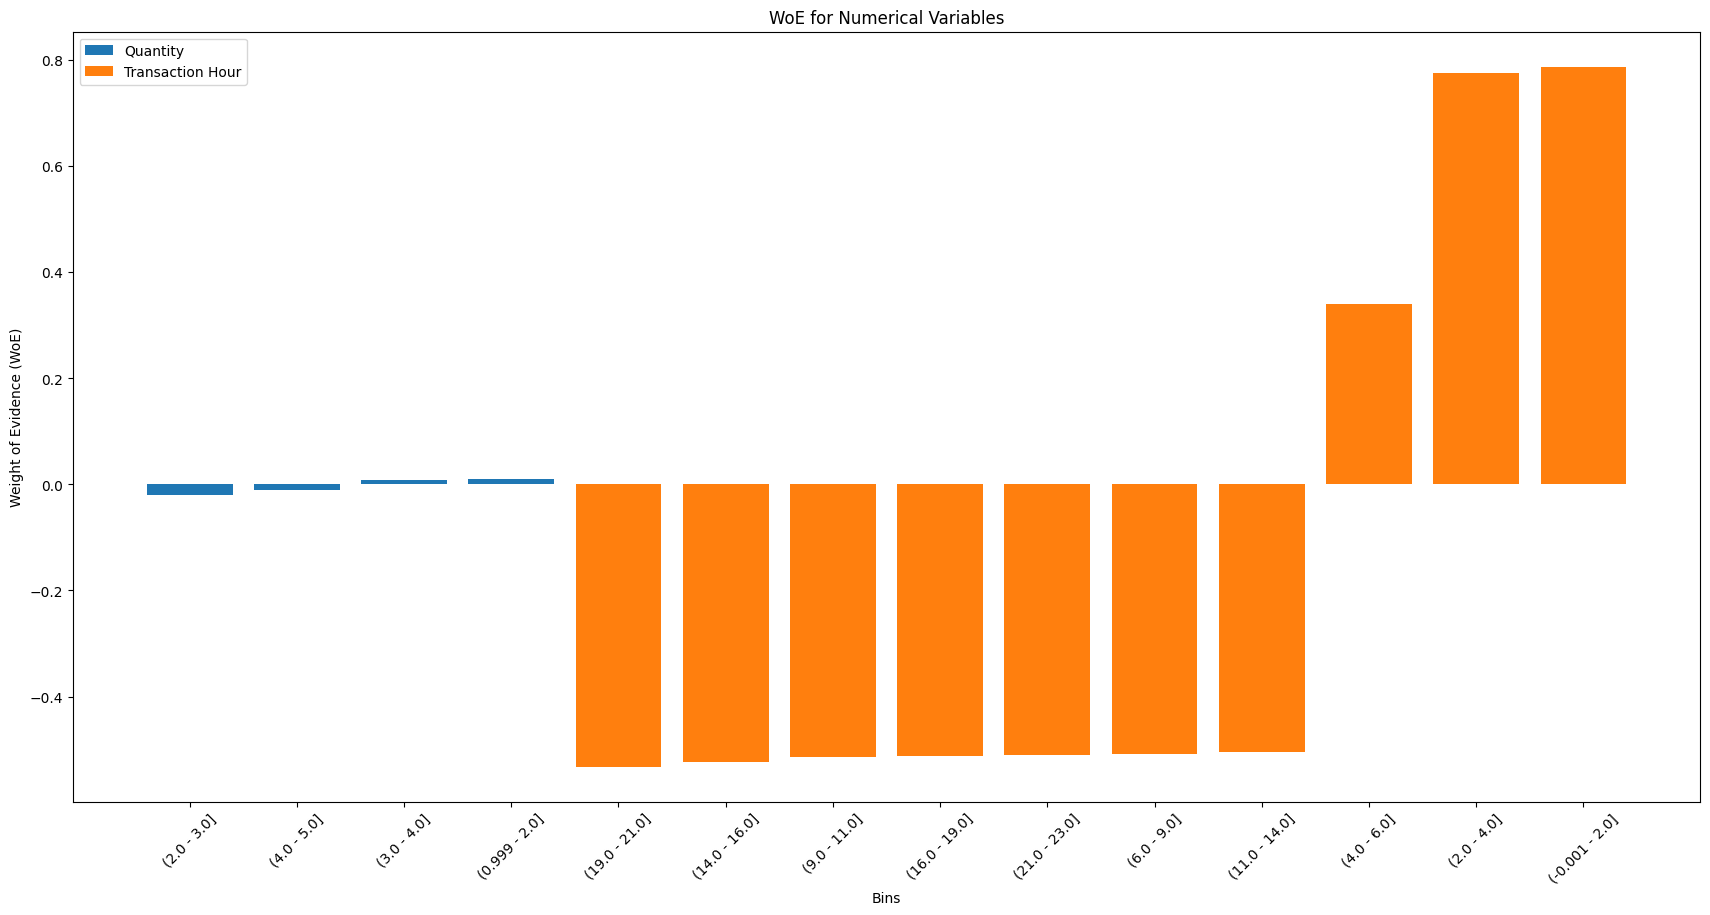

In [ ]:

# Create a bar chart to visualize WoE for numerical variables
plt.figure(figsize=(21, 10))

for column in numerical_columns:
    # Filter WoE results for the current variable
    woe_iv_column = woe_iv_results[woe_iv_results['Variable'] == column]

    plt.bar(woe_iv_column['Bin'], woe_iv_column['WoE'], label=column)

plt.xlabel('Bins')
plt.ylabel('Weight of Evidence (WoE)')
plt.title('WoE for Numerical Variables')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [ ]:
# Define the categorical columns
categorical_columns = ['Payment Method', 'Product Category', 'Device Used']

# Create a dfFrame 'woe_iv_results' to store results (if not already created in the previous script)
if 'woe_iv_results' not in locals():
    woe_iv_results = pd.DataFrame()

for column in categorical_columns:
    # Calculate WoE and IV
    subscribed = df[df['Is Fraudulent'] == 1].groupby(column).size()
    not_subscribed = df[df['Is Fraudulent'] == 0].groupby(column).size()

    total_subscribed = subscribed.sum()
    total_not_subscribed = not_subscribed.sum()

    proportion_subscribed = subscribed / total_subscribed
    proportion_not_subscribed = not_subscribed / total_not_subscribed

    woe = np.log(proportion_subscribed / proportion_not_subscribed)
    iv = (proportion_subscribed - proportion_not_subscribed) * woe

    # Create a dfFrame to store the results for this column
    woe_iv_column = pd.DataFrame({
        'Bin': subscribed.index,  # Assuming categorical columns don't need binning
        'WoE': woe,
        'IV': iv
    })

    woe_iv_column['Variable'] = column  # Add the variable name

    # Append the results to the main dfFrame
    woe_iv_results = pd.concat([woe_iv_results, woe_iv_column], ignore_index=True)

# Sort the table by WoE values
woe_iv_results = woe_iv_results.sort_values(by='WoE')

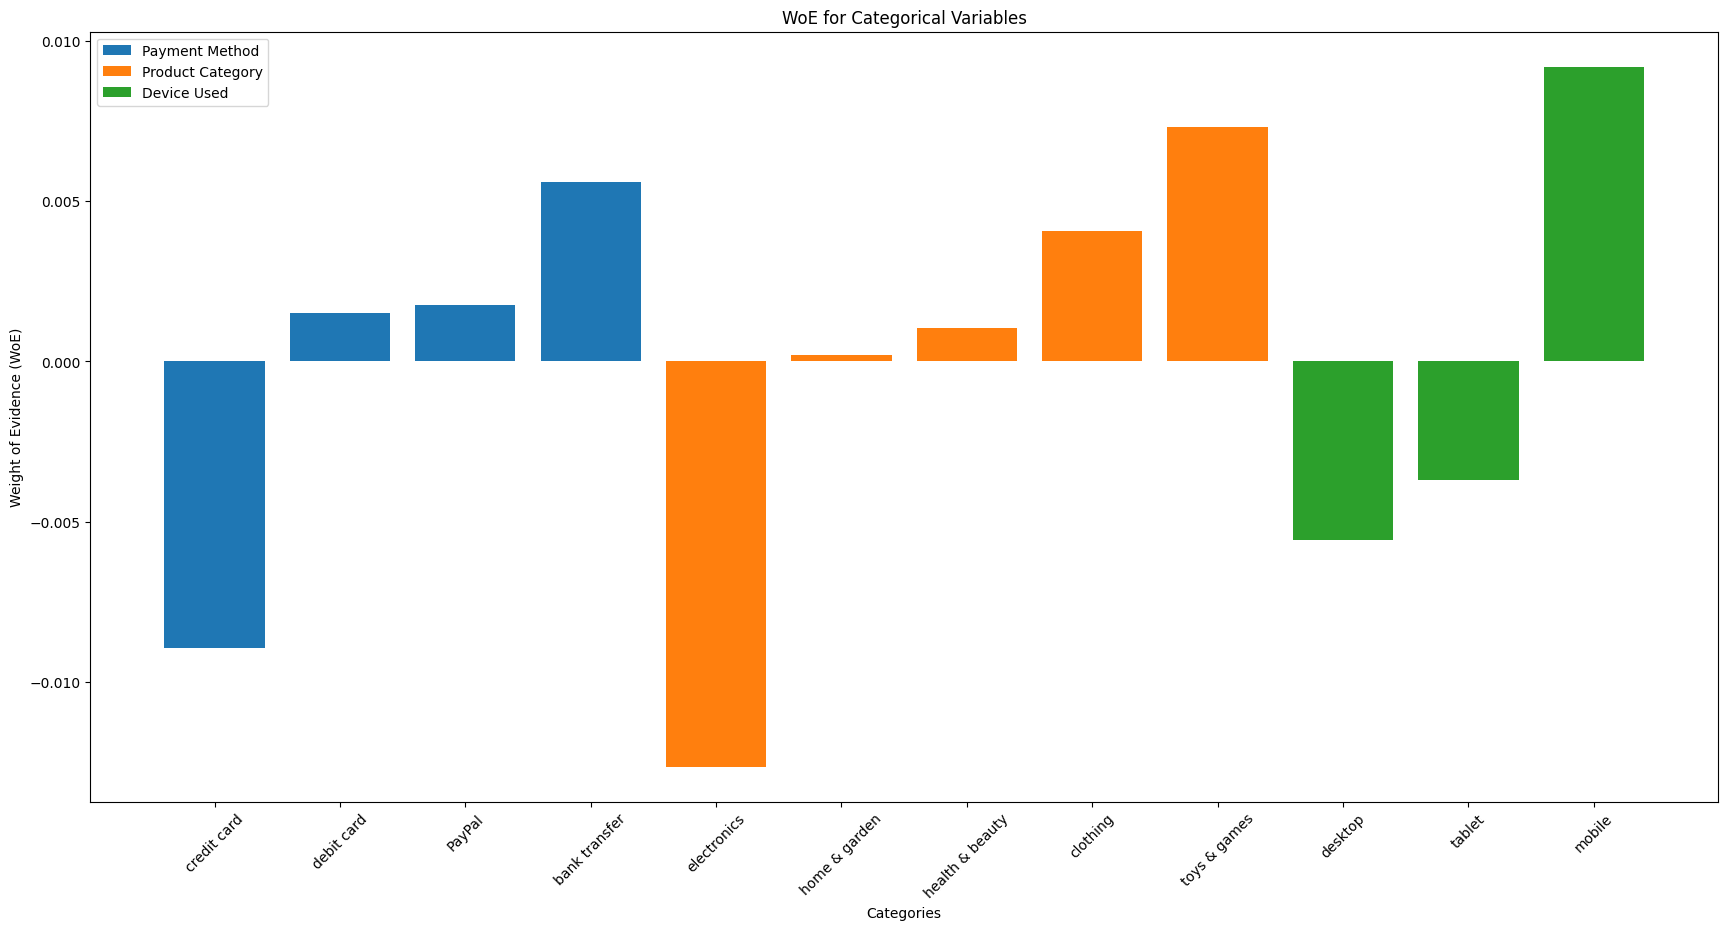

In [ ]:
# Create a bar chart to visualize WoE for categorical variables
plt.figure(figsize=(21, 10))

for column in categorical_columns:
    # Filter WoE results for the current variable
    woe_iv_column = woe_iv_results[woe_iv_results['Variable'] == column]

    plt.bar(woe_iv_column['Bin'], woe_iv_column['WoE'], label=column)

plt.xlabel('Categories')
plt.ylabel('Weight of Evidence (WoE)')
plt.title('WoE for Categorical Variables')
plt.xticks(rotation=45)
plt.legend()
plt.show()

## Model Building and Evaluation

### Feature Engineering
The "type" column in the dataset contains categorical data namely:
- PAYMENT
- TRANSFER
- CASH_OUT
- DEBIT
- CASH_IN

We will be using label encoding to convert the categorical data to numerical datatype.

In [ ]:

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# List of categorical columns to encode
categorical_columns = ['Payment Method', 'Product Category', 'Device Used']

# Encode each categorical column and drop the original
for col in categorical_columns:
    df[col + '_encoded'] = label_encoder.fit_transform(df[col])
    df.drop(col, axis=1, inplace=True)

In [ ]:
df

,Transaction ID,Customer ID,Transaction Amount,Transaction Date,Quantity,Customer Age,Customer Location,IP Address,Shipping Address,Billing Address,Is Fraudulent,Account Age Days,Transaction Hour,age_bins,Transaction Amount_bins,Account Age Days_bins,Quantity_bins,Transaction Hour_bins,Payment Method_encoded,Product Category_encoded,Device Used_encoded
832274,b905882f-a9ef-4115-ac16-00fb74976d10,fb2150ba-3549-4e68-a216-9d45a1d9b731,99.01,2024-02-02 21:16:38,2,39,Khanport,157.249.251.143,"PSC 7432, Box 8582\r\nAPO AP 14453","PSC 7432, Box 8582\r\nAPO AP 14453",0,352,21,"(37.0, 40.0]","(82.72, 114.44]","(328.0, 365.0]","(0.999, 2.0]","(19.0, 21.0]",1,3,1
683536,a0f016ba-8c1a-4193-995c-c1ae3a407080,c875d4fd-4c56-4e37-af6c-e3bfd2b425fb,62.88,2024-01-28 20:27:32,1,43,South Laurafort,221.105.126.229,"6086 Little Parkway Apt. 168\r\nNorth Oscar, C...","6086 Little Parkway Apt. 168\r\nNorth Oscar, C...",0,349,20,"(40.0, 43.0]","(55.51, 82.72]","(328.0, 365.0]","(0.999, 2.0]","(19.0, 21.0]",3,2,1
909514,46a0edc0-1e5a-4520-a2a4-067bc72c422e,013f34ab-8809-4790-83af-141ab8d20fab,200.91,2024-03-17 21:36:04,4,36,Valentinechester,89.209.223.0,"9868 Rachel Mountains\r\nPatriciastad, HI 41829","9868 Rachel Mountains\r\nPatriciastad, HI 41829",0,342,21,"(35.0, 37.0]","(197.74, 257.61]","(328.0, 365.0]","(3.0, 4.0]","(19.0, 21.0]",1,0,2
216312,bf8a9f8b-f846-4da0-a1ef-cfb8ce058f77,b1eaebb4-99a1-495c-a005-9000ccd6545b,209.83,2024-03-09 23:56:58,2,14,New Stefanie,30.71.2.27,389 Jessica Underpass Suite 018\r\nCastroville...,389 Jessica Underpass Suite 018\r\nCastroville...,0,356,23,"(-16.001, 22.0]","(197.74, 257.61]","(328.0, 365.0]","(0.999, 2.0]","(21.0, 23.0]",1,2,0
939901,64adae0b-44a8-4319-80f6-4a6aa249dc85,a033d61d-35d8-4db4-95c9-7219e11d6b76,40.34,2024-03-01 17:36:02,3,37,Myersville,82.244.139.59,"547 Pacheco Harbor\r\nWest Williamside, CA 47005","547 Pacheco Harbor\r\nWest Williamside, CA 47005",0,335,17,"(35.0, 37.0]","(31.45, 55.51]","(328.0, 365.0]","(2.0, 3.0]","(16.0, 19.0]",2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468169,394db59b-4b4f-446c-aa30-1c56a08eb22e,d61637dd-e49d-4721-ba97-97f795e3f9a5,125.36,2024-03-26 00:56:31,3,22,East Christinechester,85.19.87.247,"52279 Carl Hollow Apt. 627\r\nDeborahton, SD 3...","52279 Carl Hollow Apt. 627\r\nDeborahton, SD 3...",0,3,0,"(-16.001, 22.0]","(114.44, 151.76]","(0.999, 30.0]","(2.0, 3.0]","(-0.001, 2.0]",2,2,1
579724,728f7191-0a40-4dab-a723-13465b33db1d,3bdf8350-31b5-4c6c-ab56-00fcc2a164a9,276.57,2024-02-12 19:16:14,1,29,North Reneefurt,212.47.128.18,"PSC 0570, Box 2502\r\nAPO AA 46026","PSC 0570, Box 2502\r\nAPO AA 46026",0,30,19,"(26.0, 29.0]","(257.61, 343.42]","(0.999, 30.0]","(0.999, 2.0]","(16.0, 19.0]",3,2,1
126033,ae22eab0-88bd-4401-b52f-af7fe5cd4dd7,a642cc1f-2d50-4fd8-baa7-1576609ae98b,254.77,2024-03-26 07:53:05,2,39,Lake Cassandra,183.37.137.43,"825 Espinoza Square Suite 067\r\nButlerside, F...","825 Espinoza Square Suite 067\r\nButlerside, F...",1,8,7,"(37.0, 40.0]","(197.74, 257.61]","(0.999, 30.0]","(0.999, 2.0]","(6.0, 9.0]",3,3,0
581751,ebcdf024-898e-43bb-9087-5f3f1e9021f6,06fd81df-5263-4af7-9d0a-36978fc14deb,30.33,2024-01-07 01:02:25,3,50,Rebeccaborough,92.73.25.105,"626 Scott Port Apt. 461\r\nLongstad, FL 72322","626 Scott Port Apt. 461\r\nLongstad, FL 72322",0,15,1,"(47.0, 86.0]","(9.999, 31.45]","(0.999, 30.0]","(2.0, 3.0]","(-0.001, 2.0]",0,2,2


In [ ]:
df.drop(labels = ["Transaction ID", "Transaction Date","Customer Location","IP Address","Shipping Address","Billing Address","age_bins","Account Age Days_bins","Quantity_bins","Transaction Amount_bins","Transaction Hour_bins"], axis=1, inplace=True)

In [ ]:
data = df.copy(deep = True)

In [ ]:
# get all categorical columns in the dataframe
catCols = [col for col in data.columns if data[col].dtype=="O"]

lb_make = LabelEncoder()

for item in catCols:
    data[item] = lb_make.fit_transform(data[item])

In [ ]:
data.head()

,Customer ID,Transaction Amount,Quantity,Customer Age,Is Fraudulent,Account Age Days,Transaction Hour,Payment Method_encoded,Product Category_encoded,Device Used_encoded
832274,1445030,99.01,2,39,0,352,21,1,3,1
683536,1152971,62.88,1,43,0,349,20,3,2,1
909514,7272,200.91,4,36,0,342,21,1,0,2
216312,1023348,209.83,2,14,0,356,23,1,2,0
939901,921651,40.34,3,37,0,335,17,2,1,0


In [ ]:
processed_file_path = r'C:\Users\Sunjeevi\PycharmProjects\NewBankingFraudTransaction\.venv\UNewBankingFraud\Dataset\cleaned_data.csv'
data.to_csv(processed_file_path, index=False)

In [ ]:
# The function below will be used to evaluate different metrics of the algorithms used here.

def evaluate_model(y_test, y_pred):
    print("Accuracy Score: ", accuracy_score(y_test, y_pred))
    print("Precision Score: ", precision_score(y_test, y_pred))
    print("Recall Score: ", recall_score(y_test, y_pred))
    print("F1 Score: ", f1_score(y_test, y_pred))
    print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))
    

    df = {'y_Actual': y_test, 'y_Predicted': y_pred}

    df1 = pd.DataFrame(df, columns = ['y_Actual','y_Predicted'])

    clf_confusion_matrix = pd.crosstab(df['y_Predicted'], df['y_Actual'], rownames = ['Predicted'], colnames=['Actual'])

    sns.heatmap(clf_confusion_matrix, annot=True)
    

In [ ]:

X = data.drop(labels=["Is Fraudulent", "Customer ID"], axis=1)
y = data['Is Fraudulent']  # Correcting the target variable name

# Setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

Unique predicted labels:  [0]
Accuracy Score:  0.9499562782765494
Precision Score:  0.0
Recall Score:  0.0
F1 Score:  0.0
Confusion Matrix:  [[349810      0]
 [ 18428      0]]


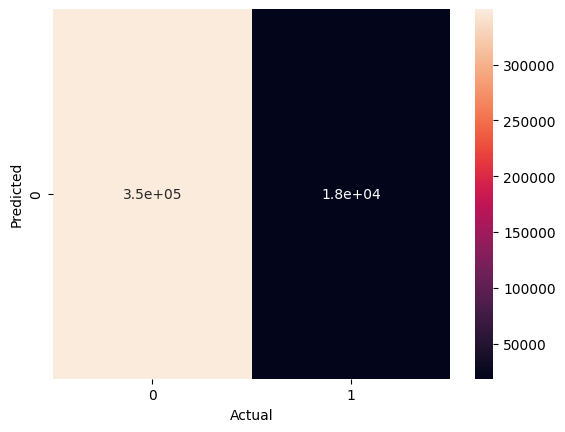

In [ ]:
# DummyClassifier to predict only target 0
dummy = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
dummy_pred = dummy.predict(X_test)

# checking unique labels
print('Unique predicted labels: ', (np.unique(dummy_pred)))

# checking accuracy
evaluate_model(y_test, dummy_pred)

As we can see the Dummy classifier accurately predicts non-fraudulent transactions with an accuracy of 99.8% but that is not our focus. We need to be able to accurately predict fraudulent transactions.

### Logistic Regression
Logistic regression estimates the probability of an event occurring, such as voted or didn't vote, based on a given dataset of independent variables. Since the outcome is a probability, the dependent variable is bounded between 0 and 1.

In [ ]:
# Modeling the data as is
# Train model
lr = LogisticRegression()
model1 = lr.fit(X_train, y_train)
 
# Predict on training set
lr_pred = model1.predict(X_test)

Accuracy Score:  0.9546977769811915
Precision Score:  0.8737157534246576
Recall Score:  0.11075537225960495
F1 Score:  0.19659025235985358
Confusion Matrix:  [[349515    295]
 [ 16387   2041]]


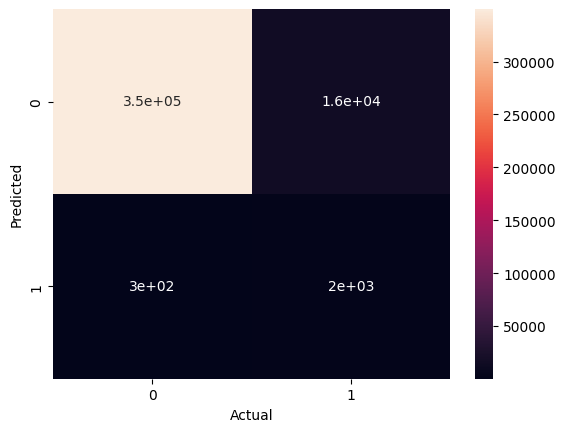

In [ ]:
evaluate_model(y_test, lr_pred)

In [ ]:
# Checking unique values
predictions = pd.DataFrame(lr_pred)
predictions[0].value_counts()

0
0    365902
1      2336
Name: count, dtype: int64

In [ ]:
pd.DataFrame(confusion_matrix(y_test, lr_pred))

,0,1
0,349515,295
1,16387,2041


The Logistic Regression Model performs quite well but the recall score is still very low. More work needs to be done with the dataset.

### Random Forest Classifier

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

Accuracy Score:  0.953769029812241
Precision Score:  0.6538798772468216
Recall Score:  0.1618732363794226
F1 Score:  0.25950413223140495
Confusion Matrix:  [[348231   1579]
 [ 15445   2983]]


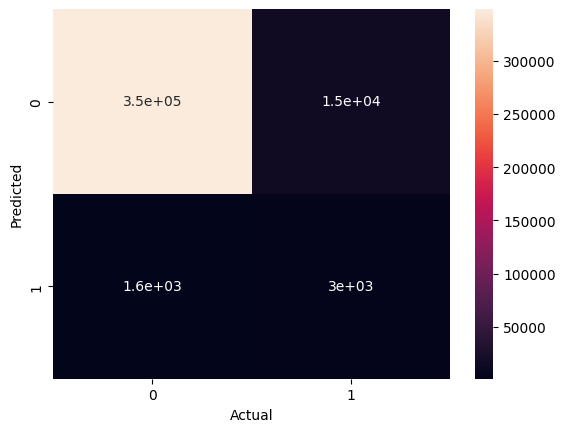

In [ ]:

rfc = RandomForestClassifier(n_estimators=10).fit(X_train, y_train)

# predict on test set
rfc_pred = rfc.predict(X_test)

evaluate_model(y_test, rfc_pred)

In [ ]:
# Checking unique values
predictions = pd.DataFrame(rfc_pred)
predictions[0].value_counts()

0
0    363676
1      4562
Name: count, dtype: int64

In [ ]:
pd.DataFrame(confusion_matrix(y_test, rfc_pred))

,0,1
0,348231,1579
1,15445,2983


We can see that the Random Forest had the best scores so far across different metrics with a recall score of 77% and an F1 score of 86%. The next sections will look at the extreme gradient boosting classifier and gradient boosted tree classifier.

### XGBoost
XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements Machine Learning algorithms under the Gradient Boosting framework. It provides a parallel tree boosting to solve many data science problems in a fast and accurate way.

Unlike accuracy, LogLoss is robust in the presence of imbalanced classes. It takes into account the certainty of the prediction. That is the evaluation metric that will be used here.

In [ ]:

xgb1 = XGBClassifier(colsample_bytree = 1.0,
                    learning_rate = 0.1,
                    max_depth =4,
                    n_estimators = 500,
                    subsample = 1.0,early_stopping_rounds=30)

eval_set = [(X_test, y_test)]

xgb1.fit(X_train, y_train, eval_set=eval_set, verbose=True)

[0]	validation_0-logloss:0.22935
[1]	validation_0-logloss:0.21847
[2]	validation_0-logloss:0.20936
[3]	validation_0-logloss:0.20160
[4]	validation_0-logloss:0.19492
[5]	validation_0-logloss:0.18912
[6]	validation_0-logloss:0.18410
[7]	validation_0-logloss:0.17974
[8]	validation_0-logloss:0.17594
[9]	validation_0-logloss:0.17264
[10]	validation_0-logloss:0.16976
[11]	validation_0-logloss:0.16726
[12]	validation_0-logloss:0.16509
[13]	validation_0-logloss:0.16320
[14]	validation_0-logloss:0.16154
[15]	validation_0-logloss:0.16013
[16]	validation_0-logloss:0.15890
[17]	validation_0-logloss:0.15784
[18]	validation_0-logloss:0.15693
[19]	validation_0-logloss:0.15614
[20]	validation_0-logloss:0.15546
[21]	validation_0-logloss:0.15488
[22]	validation_0-logloss:0.15438
[23]	validation_0-logloss:0.15395
[24]	validation_0-logloss:0.15359
[25]	validation_0-logloss:0.15328
[26]	validation_0-logloss:0.15301
[27]	validation_0-logloss:0.15279
[28]	validation_0-logloss:0.15260
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=30,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Accuracy Score:  0.9554771642253108
Precision Score:  0.7848136732978426
Recall Score:  0.15199696114608205
F1 Score:  0.25467109151247896
Confusion Matrix:  [[349042    768]
 [ 15627   2801]]


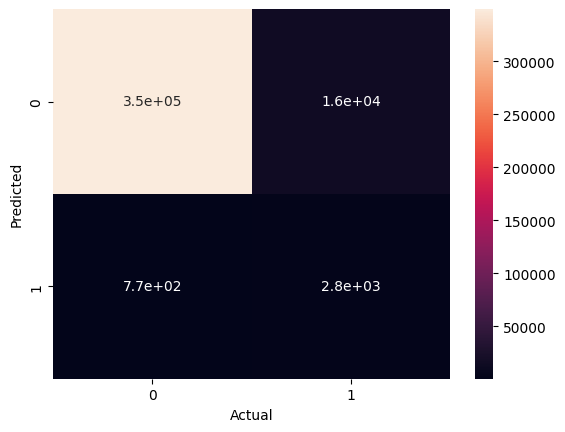

In [ ]:
pred6 = xgb1.predict(X_test)
evaluate_model(y_test, pred6)

In [ ]:
# Checking unique values
predictions = pd.DataFrame(pred6)
predictions[0].value_counts()

0
0    364669
1      3569
Name: count, dtype: int64

In [ ]:
pd.DataFrame(confusion_matrix(y_test, pred6))

,0,1
0,349042,768
1,15627,2801


In [ ]:
y_test

286697     0
1025608    0
1086478    0
1261967    0
1123646    0
          ..
305065     0
1057179    1
286873     0
1288715    0
398873     0
Name: Is Fraudulent, Length: 368238, dtype: int64

In [ ]:
y_train

1059384    0
1018745    0
229778     0
415210     0
1180711    0
          ..
219284     0
945712     0
1175980    0
1461500    0
358424     0
Name: Is Fraudulent, Length: 1104714, dtype: int64

In [ ]:
X_test

,Transaction Amount,Quantity,Customer Age,Account Age Days,Transaction Hour,Payment Method_encoded,Product Category_encoded,Device Used_encoded
286697,199.46,1,37,29,23,1,2,0
1025608,182.17,5,12,126,1,0,2,2
1086478,60.50,4,25,253,22,1,0,0
1261967,166.01,2,34,165,20,2,4,2
1123646,201.24,5,32,15,20,3,2,2
...,...,...,...,...,...,...,...,...
305065,52.93,3,24,52,3,0,0,1
1057179,1083.75,4,34,30,3,3,4,1
286873,74.14,5,39,141,8,1,0,0
1288715,315.01,5,44,71,21,2,4,2


In [ ]:
X_train

,Transaction Amount,Quantity,Customer Age,Account Age Days,Transaction Hour,Payment Method_encoded,Product Category_encoded,Device Used_encoded
1059384,316.89,4,15,35,1,0,3,1
1018745,264.67,5,34,167,17,3,2,0
229778,11.03,4,36,124,11,1,3,0
415210,230.91,5,26,96,9,2,0,2
1180711,49.12,5,29,24,18,1,4,0
...,...,...,...,...,...,...,...,...
219284,256.75,4,37,21,14,0,3,2
945712,330.91,3,37,170,16,2,2,1
1175980,56.28,4,35,326,13,2,2,1
1461500,943.35,1,13,232,20,3,4,1


### Selecting Our Final Model

The final model used which had the best scores across all metrics will be the random forest classifier.

In [ ]:
joblib.dump(rfc, r"C:\Users\Sunjeevi\PycharmProjects\NewBankingFraudTransaction\.venv\UNewBankingFraud\ModelFiles\trans_fraud.pkl")

['C:\\Users\\Sunjeevi\\PycharmProjects\\NewBankingFraudTransaction\\.venv\\UNewBankingFraud\\ModelFiles\\trans_fraud.pkl']

## Load The Best Model

In [ ]:
# Replace joblib.dump with joblib.load to load the model
best_model = joblib.load(r"C:\Users\Sunjeevi\PycharmProjects\NewBankingFraudTransaction\.venv\UNewBankingFraud\ModelFiles\trans_fraud.pkl")

In [ ]:
# Make predictions
y_pred = best_model.predict(X_test)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

Accuracy: 0.953769029812241
Precision: 0.6538798772468216
Recall: 0.1618732363794226
F1-score: 0.25950413223140495


In [ ]:

# Calculate ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred)
print(f'ROC-AUC: {roc_auc}')

# Calculate Gini coefficient
gini_coefficient = 2 * roc_auc - 1
print(f'Gini Coefficient: {gini_coefficient}')

ROC-AUC: 0.5786796787082785
Gini Coefficient: 0.15735935741655704


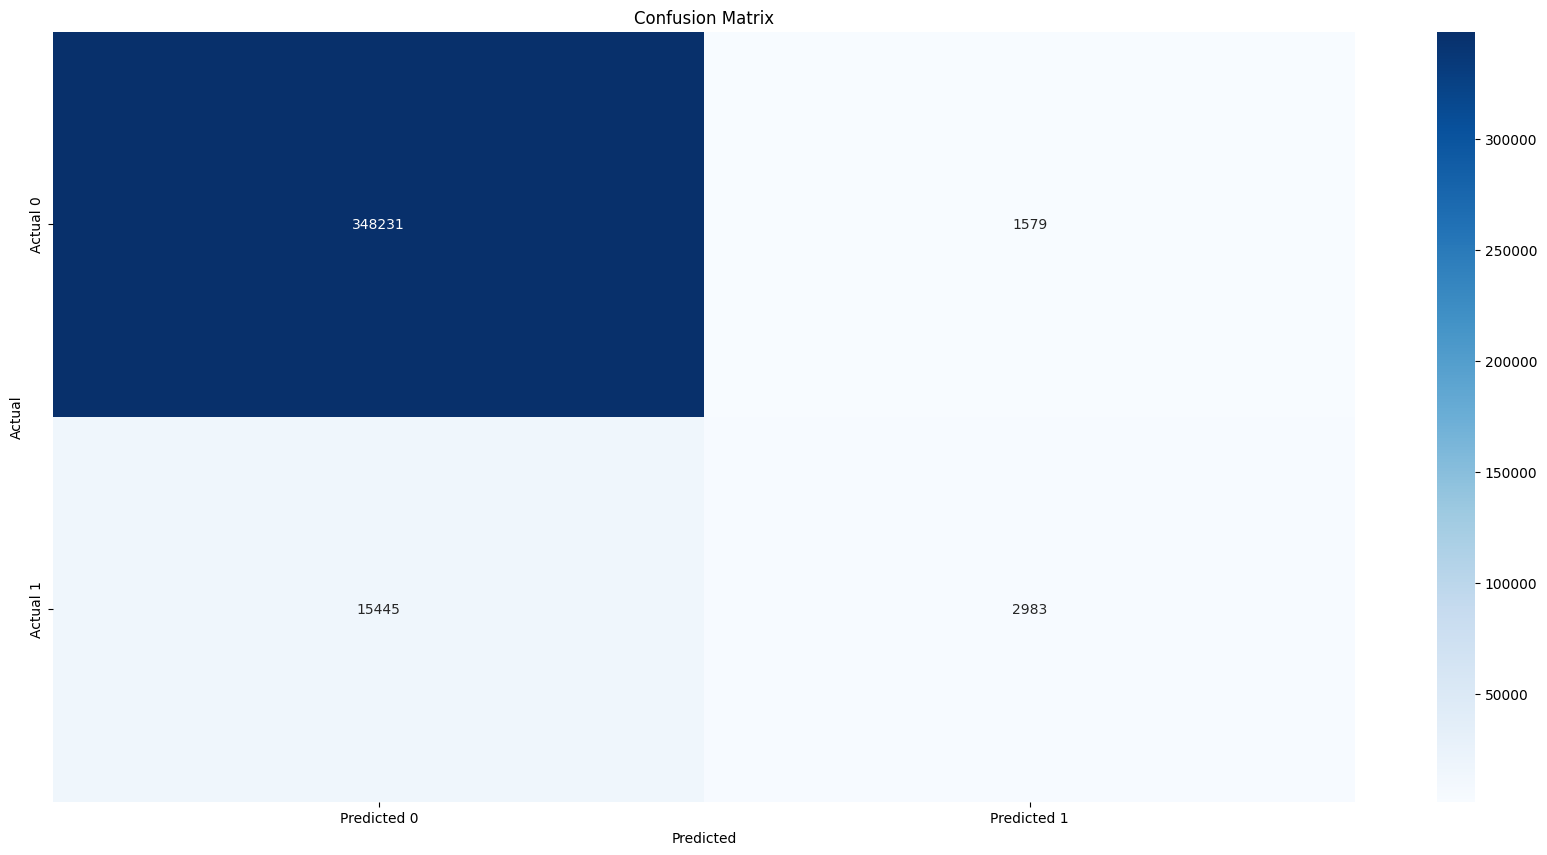

In [ ]:

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap
plt.figure(figsize=(21, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Build The Model

In [ ]:
results_df = pd.read_csv(r'C:\Users\Sunjeevi\PycharmProjects\NewBankingFraudTransaction\.venv\UNewBankingFraud\Dataset\Test.csv')

In [ ]:
results_df

,Transaction ID,Customer ID,Transaction Amount,Transaction Date,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,IP Address,Shipping Address,Billing Address,Is Fraudulent,Account Age Days,Transaction Hour
0,c12e07a0-8a06-4c0d-b5cc-04f3af688570,8ca9f102-02a4-4207-ab63-484e83a1bdf0,42.32,2024-03-24 23:42:43,PayPal,electronics,1,40,East Jameshaven,desktop,110.87.246.85,5399 Rachel Stravenue Suite 718\r\nNorth Blake...,5399 Rachel Stravenue Suite 718\r\nNorth Blake...,0,282,23
1,7d187603-7961-4fce-9827-9698e2b6a201,4d158416-caae-4b09-bd5b-15235deb9129,301.34,2024-01-22 00:53:31,credit card,electronics,3,35,Kingstad,tablet,14.73.104.153,"5230 Stephanie Forge\r\nCollinsbury, PR 81853","5230 Stephanie Forge\r\nCollinsbury, PR 81853",0,223,0
2,f2c14f9d-92df-4aaf-8931-ceaf4e63ed72,ccae47b8-75c7-4f5a-aa9e-957deced2137,340.32,2024-01-22 08:06:03,debit card,toys & games,5,29,North Ryan,desktop,67.58.94.93,"195 Cole Oval\r\nPort Larry, IA 58422",4772 David Stravenue Apt. 447\r\nVelasquezside...,0,360,8
3,e9949bfa-194d-486b-84da-9565fca9e5ce,b04960c0-aeee-4907-b1cd-4819016adcef,95.77,2024-01-16 20:34:53,credit card,electronics,5,45,Kaylaville,mobile,202.122.126.216,"7609 Cynthia Square\r\nWest Brenda, NV 23016","7609 Cynthia Square\r\nWest Brenda, NV 23016",0,325,20
4,7362837c-7538-434e-8731-0df713f5f26d,de9d6351-b3a7-4bc7-9a55-8f013eb66928,77.45,2024-01-16 15:47:23,credit card,clothing,5,42,North Edwardborough,desktop,96.77.232.76,"2494 Robert Ramp Suite 313\r\nRobinsonport, AS...","2494 Robert Ramp Suite 313\r\nRobinsonport, AS...",0,116,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23629,d8b7171f-bdd9-479c-b98b-396c621aebfe,98a3d94c-dc9a-4525-b273-e6ffe54cc5a4,53.73,2024-01-26 16:25:05,PayPal,toys & games,5,32,Rebeccafurt,tablet,173.97.197.128,USNV Clayton\r\nFPO AE 82639,USNV Clayton\r\nFPO AE 82639,0,363,16
23630,0fd12cf3-c641-4499-8de1-15dc4555cb0c,b3429f52-8b27-46b5-914c-4accd989edb4,47.42,2024-02-25 17:03:26,credit card,clothing,4,41,Nataliefort,desktop,133.222.22.48,"9288 Patricia Cape Apt. 527\r\nMelissaton, IL ...","9288 Patricia Cape Apt. 527\r\nMelissaton, IL ...",0,296,17
23631,649680d3-a684-44cb-95bf-9b454c3aa86d,066e25c9-4420-4224-bc3f-1a462708090e,1045.23,2024-03-28 23:46:47,bank transfer,health & beauty,1,9,East Shannonville,tablet,206.133.237.168,3015 Elizabeth Summit Suite 819\r\nEast Joelfo...,3015 Elizabeth Summit Suite 819\r\nEast Joelfo...,0,329,23
23632,c10dbb08-28fc-4ec1-9850-d4e98d2b9640,cde96e9c-f562-4b8c-8fa8-f356f474232b,34.25,2024-02-09 11:29:18,debit card,home & garden,2,39,Lake Nicole,mobile,16.204.137.130,"531 Brittany Pike\r\nNew Stacy, OR 87952","531 Brittany Pike\r\nNew Stacy, OR 87952",0,347,11


In [ ]:

# Change datatype of 'ID' column in df_test
results_df[['Customer ID', 'Is Fraudulent']] = results_df[['Customer ID', 'Is Fraudulent']].astype(str)

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# List of categorical columns to encode
categorical_columns = ['Payment Method', 'Product Category', 'Device Used']

# Encode each categorical column and drop the original
for col in categorical_columns:
    results_df[col + '_encoded'] = label_encoder.fit_transform(results_df[col])
    results_df.drop(col, axis=1, inplace=True)

In [ ]:
results_df = results_df.drop(['Transaction ID', 'Transaction Date', 'IP Address', 'Customer Location', 'Shipping Address', 'Billing Address'], axis=1)

In [ ]:
results_df

,Customer ID,Transaction Amount,Quantity,Customer Age,Is Fraudulent,Account Age Days,Transaction Hour,Payment Method_encoded,Product Category_encoded,Device Used_encoded
0,8ca9f102-02a4-4207-ab63-484e83a1bdf0,42.32,1,40,0,282,23,0,1,0
1,4d158416-caae-4b09-bd5b-15235deb9129,301.34,3,35,0,223,0,2,1,2
2,ccae47b8-75c7-4f5a-aa9e-957deced2137,340.32,5,29,0,360,8,3,4,0
3,b04960c0-aeee-4907-b1cd-4819016adcef,95.77,5,45,0,325,20,2,1,1
4,de9d6351-b3a7-4bc7-9a55-8f013eb66928,77.45,5,42,0,116,15,2,0,0
...,...,...,...,...,...,...,...,...,...,...
23629,98a3d94c-dc9a-4525-b273-e6ffe54cc5a4,53.73,5,32,0,363,16,0,4,2
23630,b3429f52-8b27-46b5-914c-4accd989edb4,47.42,4,41,0,296,17,2,0,0
23631,066e25c9-4420-4224-bc3f-1a462708090e,1045.23,1,9,0,329,23,1,2,2
23632,cde96e9c-f562-4b8c-8fa8-f356f474232b,34.25,2,39,0,347,11,3,3,1


In [ ]:
X = results_df.drop(['Customer ID', 'Is Fraudulent'], axis=1)
Y = results_df['Is Fraudulent']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [ ]:
# training the Logistic Regression Model with Training Data
best_model.fit(X_train, Y_train)
# accuracy on training data
X_train_prediction = best_model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9915904162479505


In [ ]:
# accuracy on test data
X_test_prediction = best_model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9536704040617728
